# Import Library

In [ ]:
# !pip install scikit-learn

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MultiLabelBinarizer
from sklearn.decomposition import PCA

import re
import tqdm

# Loading Original Form Data

## Open CSV File

In [2]:
filename_form = 'Karakteristik Pembelajar Universitas Pertamina (Jawaban) - Form Responses 1.csv'

In [3]:
df_original = pd.read_csv(filename_form)

In [4]:
df_original.head()

,Timestamp,Nama,NIM,Jenis Kelamin,Tahun Lahir,Tempat Tinggal Saat Ini,Provinsi Asal Saat SMA,Kota Asal Saat SMA,IPK Saat Ini,IPS Semester Genap 2021/2022,...,Preferensi Komunikasi Pembelajaran Kuliah.1,Apakah Anda Suka Ikut Lomba ?.1,Berapa Kali Anda Kira-Kira Mengikuti Lomba Pada Saat Berkuliah ?.1,Pendapat Anda Mengenai Persepsi atau Kesan Terhadap Mata Kuliah Praktikum Pembelajaran Mesin Prodi Ilmu Komputer,Apakah Anda Meluangkan Waktu Khusus Untuk Belajar Diluar Jam Pembelajaran Kuliah ?.2,"Bagaimana Cara Anda untuk Mempelajari Suatu Materi atau Mata Kuliah, Diluar Jam Pembelajaran Kuliah.2",Jenis Online Course atau Platform Belajar Online Yang Diikuti.2,Preferensi Komunikasi Pembelajaran Kuliah.2,Apakah Anda Suka Ikut Lomba ?.2,Berapa Kali Anda Kira-Kira Mengikuti Lomba Pada Saat Berkuliah ?.2
0,10/04/2023 7:43:11,Louis pratama,103120114,Laki-laki,2000,Bersama Orang Tua,DKI Jakarta,Jakarta,3.01,2.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/04/2023 8:43:51,Mohammad Ammar Firdaus,103121024,Laki-laki,2001,Kos,Jawa Tengah,Pekalongan,3.25,3.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/04/2023 8:59:56,Dika Pramuidita,103121035,Laki-laki,2003,Bersama Orang Tua,DKI Jakarta,Kota Administrasi Jakarta Timur,3.29,3.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/04/2023 9:01:48,Haryo Shandy Busiry,103121017,Laki-laki,2003,Bersama Orang Tua,DKI Jakarta,Jakarta,3.33,3.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/04/2023 9:09:33,Wira Yudha Gunawan,103121012,Laki-laki,2003,Kos,Sumatera Utara,Sibolga,NaN,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 73 columns):
 #   Column                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                             --------------  -----  
 0   Timestamp                                                                                                          141 non-null    object 
 1   Nama                                                                                                               141 non-null    object 
 2   NIM                                                                                                                141 non-null    int64  
 3   Jenis Kelamin                                                                                                      140 non-null    object 
 4   Tahun Lahir               

In [6]:
df_original.columns

Index(['Timestamp', 'Nama', 'NIM', 'Jenis Kelamin', 'Tahun Lahir',
       'Tempat Tinggal Saat Ini', 'Provinsi Asal Saat SMA',
       'Kota Asal Saat SMA', 'IPK Saat Ini', 'IPS Semester Genap 2021/2022',
       'IPS Semester Ganjil 2022/2023', 'Nilai Mata Kuliah Matematika Bisnis',
       'Nilai Mata Kuliah Bahasa Inggris I', 'Jumlah SKS Semester Ini',
       'Jumlah Mata Kuliah Mengulang',
       'Apakah di Semester Ini Anda Memiliki Beasiswa ?',
       'Jalur Pendaftaran Kampus', 'Jenis Sekolah / Pendidikan Sebelum Kuliah',
       'Jenis Sekolah SMA', 'Nilai Total UTBK', 'Nilai Total UN',
       'Nilai Matematika SMA/Sederajat Kelas 12', 'Pendidikan Terakhir Ibu',
       'Pendidikan Terakhir Ayah', 'Jumlah Saudara Kandung',
       'Siapakah Role Model / Panutan Anda di Keluarga ?',
       'Penghasilan Orang Tua', 'Jenis Tempat Tinggal Keluarga',
       'Pendapat Anda Mengenai Persepsi atau Kesan Terhadap Mata Kuliah Sistem Informasi Manajemen',
       'Apakah Anda Meluangkan Waktu Kh

## Fill Missinput Class Name Data

In [7]:
df = df_original.copy()

In [8]:
df['Nama Kelas yang Diikuti'].value_counts(dropna=False)

Nama Kelas yang Diikuti
NaN                                                  56
Praktikum Pembelajaran Mesin Prodi Ilmu Komputer     44
Sains Data dan Pembelajaran Mesin dalam Geofisika    41
Name: count, dtype: int64

In [9]:
df['Nama Kelas yang Diikuti'] = df['Nama Kelas yang Diikuti'].fillna('Sistem Informasi Manajemen')

df['Nama Kelas yang Diikuti'].value_counts(dropna=False)

Nama Kelas yang Diikuti
Sistem Informasi Manajemen                           56
Praktikum Pembelajaran Mesin Prodi Ilmu Komputer     44
Sains Data dan Pembelajaran Mesin dalam Geofisika    41
Name: count, dtype: int64

## Combine Multiple Redundant Column

In [10]:
dict_redundant_columns = {
    'Timestamp':None,
    'Nama':None,
    'NIM':None,
    'Nama Kelas yang Diikuti':['Nama Kelas yang Diikuti.1'],
    'Jenis Kelamin':None,
    'Tahun Lahir':None,
    'Tempat Tinggal Saat Ini':None,
    'Provinsi Asal Saat SMA':None,
    'Kota Asal Saat SMA':None,
    'IPK Saat Ini':['IPK Saat Ini.1'],
    'IPS Semester Genap 2021/2022':['IPS Semester Genap 2021/2022.1'],
    'IPS Semester Ganjil 2022/2023':['IPS Semester Ganjil 2022/2023.1'],
    'Nilai Mata Kuliah Matematika Bisnis':None,
    'Nilai Mata Kuliah Kalkulus I':None,
    'Nilai Mata Kuliah Bahasa Inggris I':['Nilai Mata Kuliah Bahasa Inggris I.1'],
    'Jumlah SKS Semester Ini':['Jumlah SKS Semester Ini.1'],
    'Jumlah Mata Kuliah Mengulang':['Jumlah Mata Kuliah Mengulang.1'],
    'Apakah di Semester Ini Anda Memiliki Beasiswa ?':['Apakah di Semester Ini Anda Memiliki Beasiswa ?.1'],
    'Jalur Pendaftaran Kampus':None,
    'Jenis Sekolah / Pendidikan Sebelum Kuliah':None,
    'Jenis Sekolah SMA':None,
    'Nilai Total UTBK':None,
    'Nilai Total UN':None,
    'Nilai Matematika SMA/Sederajat Kelas 12':None,
    'Pendidikan Terakhir Ibu':None,
    'Pendidikan Terakhir Ayah':['Pendidikan Terakhir Bapak'],
    'Jumlah Saudara Kandung':None,
    'Siapakah Role Model / Panutan Anda di Keluarga ?':None,
    'Penghasilan Orang Tua':None,
    'Jenis Tempat Tinggal Keluarga':None,
    'Pendapat Anda Mengenai Persepsi atau Kesan Terhadap Mata Kuliah Sistem Informasi Manajemen':[
        'Pendapat Anda Mengenai Persepsi atau Kesan Terhadap Mata Kuliah Sains Data dan Pembelajaran Mesin dalam Geofisika',
        'Pendapat Anda Mengenai Persepsi atau Kesan Terhadap Mata Kuliah Praktikum Pembelajaran Mesin Prodi Ilmu Komputer'
    ],
    'Apakah Anda Meluangkan Waktu Khusus Untuk Belajar Diluar Jam Pembelajaran Kuliah ?':[
        'Apakah Anda Meluangkan Waktu Khusus Untuk Belajar Diluar Jam Pembelajaran Kuliah ?.1',
        'Apakah Anda Meluangkan Waktu Khusus Untuk Belajar Diluar Jam Pembelajaran Kuliah ?.2'
    ],
    'Bagaimana Cara Anda untuk Mempelajari Suatu Materi atau Mata Kuliah, Diluar Jam Pembelajaran Kuliah':[
        'Bagaimana Cara Anda untuk Mempelajari Suatu Materi atau Mata Kuliah, Diluar Jam Pembelajaran Kuliah.1',
        'Bagaimana Cara Anda untuk Mempelajari Suatu Materi atau Mata Kuliah, Diluar Jam Pembelajaran Kuliah.2'
    ],
    'Jenis Online Course atau Platform Belajar Online Yang Diikuti':[
        'Jenis Online Course atau Platform Belajar Online Yang Diikuti.1',
        'Jenis Online Course atau Platform Belajar Online Yang Diikuti.2'
    ],
    'Preferensi Komunikasi Pembelajaran Kuliah':[
        'Preferensi Komunikasi Pembelajaran Kuliah.1',
        'Preferensi Komunikasi Pembelajaran Kuliah.2'
    ],
    'Apakah Anda Suka Ikut Lomba ?':[
        'Apakah Anda Suka Ikut Lomba ?.1',
        'Apakah Anda Suka Ikut Lomba ?.2'
    ],
    'Berapa Kali Anda Kira-Kira Mengikuti Lomba Pada Saat Berkuliah ?':[
        'Berapa Kali Anda Kira-Kira Mengikuti Lomba Pada Saat Berkuliah ?.1',
        'Berapa Kali Anda Kira-Kira Mengikuti Lomba Pada Saat Berkuliah ?.2'
    ],
    'Sosial Media Apa yang Sering Anda Gunakan ?':None,
    'Kira-kira, Berapa Jam Rata-rata perhari Anda Menghabiskan Waktu Menggunakan Sosial Media ?':None,
    'Permainan Genre Apa Yang Anda Mainkan ?':None,
    'Jenis Organisasi Yang Diikuti':None,
    'Jenis Kegiatan UKM yang Diikuti':None,
    'Berapa Estimasi Waktu Tempuh Anda (Dalam Menit) Berangkat Ke Kampus ?':None,
    'Apakah Anda Bekerja Semasa Kuliah ?':None,
    'Jika Anda Bekerja Semasa Kuliah, Berapa Jam (Per Minggu) Kira-kira Anda Bekerja ?':None,
    'Jika Anda Bekerja Semasa Kuliah, Tipe Pekerjaan Apa Yang Anda Lakukan ?':None,
    'Apakah anda bersedia untuk mengisi kuisioner lanjutan ?':None,
    'Cantumkan nomor telepon anda untuk kesempatan mendapatkan pulsa sebesar Rp. 25.000':None,
    'Isilah alamat email anda, untuk mendapatkan informasi mengenai kuisioner lanjutan':None,
}

In [11]:
def merge_redundant_column(dataframe_redundant, dict_redundant):
    dataframe = pd.DataFrame()
    for column, redundant in dict_redundant.items():
        if redundant == None:
            dataframe[column] = dataframe_redundant[column]
        else:
            columns_to_merge = [column] + redundant
            merged_columns = dataframe_redundant[columns_to_merge].fillna(method='bfill', axis=1)
            dataframe[column] = merged_columns.drop(columns=redundant)
    
    return dataframe

df = merge_redundant_column(df, dict_redundant_columns)
df.head()

,Timestamp,Nama,NIM,Nama Kelas yang Diikuti,Jenis Kelamin,Tahun Lahir,Tempat Tinggal Saat Ini,Provinsi Asal Saat SMA,Kota Asal Saat SMA,IPK Saat Ini,...,Permainan Genre Apa Yang Anda Mainkan ?,Jenis Organisasi Yang Diikuti,Jenis Kegiatan UKM yang Diikuti,Berapa Estimasi Waktu Tempuh Anda (Dalam Menit) Berangkat Ke Kampus ?,Apakah Anda Bekerja Semasa Kuliah ?,"Jika Anda Bekerja Semasa Kuliah, Berapa Jam (Per Minggu) Kira-kira Anda Bekerja ?","Jika Anda Bekerja Semasa Kuliah, Tipe Pekerjaan Apa Yang Anda Lakukan ?",Apakah anda bersedia untuk mengisi kuisioner lanjutan ?,Cantumkan nomor telepon anda untuk kesempatan mendapatkan pulsa sebesar Rp. 25.000,"Isilah alamat email anda, untuk mendapatkan informasi mengenai kuisioner lanjutan"
0,10/04/2023 7:43:11,Louis pratama,103120114,Sistem Informasi Manajemen,Laki-laki,2000,Bersama Orang Tua,DKI Jakarta,Jakarta,3.01,...,"Strategi, Multiplayer",ESPORT,Olahraga,<15,Ya,20-45,Part-Time,Ya,081282094244,luisp1750@gmail.com
1,10/04/2023 8:43:51,Mohammad Ammar Firdaus,103121024,Sistem Informasi Manajemen,Laki-laki,2001,Kos,Jawa Tengah,Pekalongan,3.25,...,Strategi,Tidak Mengikuti Organisasi,Tidak Mengikuti Kegiatan UKM,15-30,Tidak,20-45,Berdagang/Berjualan,Ya,087724122483,ammarwaex@gmail.com
2,10/04/2023 8:59:56,Dika Pramuidita,103121035,Sistem Informasi Manajemen,Laki-laki,2003,Bersama Orang Tua,DKI Jakarta,Kota Administrasi Jakarta Timur,3.29,...,"Multiplayer, DOTA 2, GTA V ONLINE, VALORANT",Himpunan Mahasiswa,Tidak Mengikuti Kegiatan UKM,60-120,Tidak,<10,Freelance,Ya,+6287873564467,dikapramudita124@gmail.com
3,10/04/2023 9:01:48,Haryo Shandy Busiry,103121017,Sistem Informasi Manajemen,Laki-laki,2003,Bersama Orang Tua,DKI Jakarta,Jakarta,3.33,...,Multiplayer,Himpunan Mahasiswa,Olahraga,30-60,Tidak,NaN,NaN,Ya,085210230865,haryoshandy@gmail.com
4,10/04/2023 9:09:33,Wira Yudha Gunawan,103121012,Sistem Informasi Manajemen,Laki-laki,2003,Kos,Sumatera Utara,Sibolga,NaN,...,"Aksi, Petualangan, Strategi, Teka-teki, Olahraga",Organisasi Keagamaan,Keagamaan,<15,Tidak,<10,Part-Time,Tidak,082260256378,NaN


# Data Cleaning

## Remove Duplicated Row of Same Student

In [12]:
df[df.duplicated(keep='last', subset=['NIM'])]

,Timestamp,Nama,NIM,Nama Kelas yang Diikuti,Jenis Kelamin,Tahun Lahir,Tempat Tinggal Saat Ini,Provinsi Asal Saat SMA,Kota Asal Saat SMA,IPK Saat Ini,...,Permainan Genre Apa Yang Anda Mainkan ?,Jenis Organisasi Yang Diikuti,Jenis Kegiatan UKM yang Diikuti,Berapa Estimasi Waktu Tempuh Anda (Dalam Menit) Berangkat Ke Kampus ?,Apakah Anda Bekerja Semasa Kuliah ?,"Jika Anda Bekerja Semasa Kuliah, Berapa Jam (Per Minggu) Kira-kira Anda Bekerja ?","Jika Anda Bekerja Semasa Kuliah, Tipe Pekerjaan Apa Yang Anda Lakukan ?",Apakah anda bersedia untuk mengisi kuisioner lanjutan ?,Cantumkan nomor telepon anda untuk kesempatan mendapatkan pulsa sebesar Rp. 25.000,"Isilah alamat email anda, untuk mendapatkan informasi mengenai kuisioner lanjutan"
14,10/04/2023 9:25:07,BASTIAN JALI RITONGA,103121036,Sistem Informasi Manajemen,Laki-laki,2003,Bersama saudara,Sumatera Utara,"Sipirok,kab.Tapsel","3,1",...,"Petualangan, Olahraga",Organisasi Keagamaan,Keagamaan,60-120,Ya,10-20,ngojek,Ya,082163424945,jalobastian@gmail.com


In [13]:
df = df.drop_duplicates(keep='last', subset=['NIM']).reset_index(drop=True)
df[df.duplicated(keep=False, subset=['NIM'])]

,Timestamp,Nama,NIM,Nama Kelas yang Diikuti,Jenis Kelamin,Tahun Lahir,Tempat Tinggal Saat Ini,Provinsi Asal Saat SMA,Kota Asal Saat SMA,IPK Saat Ini,...,Permainan Genre Apa Yang Anda Mainkan ?,Jenis Organisasi Yang Diikuti,Jenis Kegiatan UKM yang Diikuti,Berapa Estimasi Waktu Tempuh Anda (Dalam Menit) Berangkat Ke Kampus ?,Apakah Anda Bekerja Semasa Kuliah ?,"Jika Anda Bekerja Semasa Kuliah, Berapa Jam (Per Minggu) Kira-kira Anda Bekerja ?","Jika Anda Bekerja Semasa Kuliah, Tipe Pekerjaan Apa Yang Anda Lakukan ?",Apakah anda bersedia untuk mengisi kuisioner lanjutan ?,Cantumkan nomor telepon anda untuk kesempatan mendapatkan pulsa sebesar Rp. 25.000,"Isilah alamat email anda, untuk mendapatkan informasi mengenai kuisioner lanjutan"


## Remove Unnecessary Column

In [14]:
df.columns

Index(['Timestamp', 'Nama', 'NIM', 'Nama Kelas yang Diikuti', 'Jenis Kelamin',
       'Tahun Lahir', 'Tempat Tinggal Saat Ini', 'Provinsi Asal Saat SMA',
       'Kota Asal Saat SMA', 'IPK Saat Ini', 'IPS Semester Genap 2021/2022',
       'IPS Semester Ganjil 2022/2023', 'Nilai Mata Kuliah Matematika Bisnis',
       'Nilai Mata Kuliah Kalkulus I', 'Nilai Mata Kuliah Bahasa Inggris I',
       'Jumlah SKS Semester Ini', 'Jumlah Mata Kuliah Mengulang',
       'Apakah di Semester Ini Anda Memiliki Beasiswa ?',
       'Jalur Pendaftaran Kampus', 'Jenis Sekolah / Pendidikan Sebelum Kuliah',
       'Jenis Sekolah SMA', 'Nilai Total UTBK', 'Nilai Total UN',
       'Nilai Matematika SMA/Sederajat Kelas 12', 'Pendidikan Terakhir Ibu',
       'Pendidikan Terakhir Ayah', 'Jumlah Saudara Kandung',
       'Siapakah Role Model / Panutan Anda di Keluarga ?',
       'Penghasilan Orang Tua', 'Jenis Tempat Tinggal Keluarga',
       'Pendapat Anda Mengenai Persepsi atau Kesan Terhadap Mata Kuliah Sistem In

In [15]:
columns_drop = [
    'Timestamp',
    'Nama',
    'Apakah anda bersedia untuk mengisi kuisioner lanjutan ?',
    'Cantumkan nomor telepon anda untuk kesempatan mendapatkan pulsa sebesar Rp. 25.000',
    'Isilah alamat email anda, untuk mendapatkan informasi mengenai kuisioner lanjutan'
]
df_cleaned = df.drop(columns=columns_drop)
df_cleaned.head()

,NIM,Nama Kelas yang Diikuti,Jenis Kelamin,Tahun Lahir,Tempat Tinggal Saat Ini,Provinsi Asal Saat SMA,Kota Asal Saat SMA,IPK Saat Ini,IPS Semester Genap 2021/2022,IPS Semester Ganjil 2022/2023,...,Berapa Kali Anda Kira-Kira Mengikuti Lomba Pada Saat Berkuliah ?,Sosial Media Apa yang Sering Anda Gunakan ?,"Kira-kira, Berapa Jam Rata-rata perhari Anda Menghabiskan Waktu Menggunakan Sosial Media ?",Permainan Genre Apa Yang Anda Mainkan ?,Jenis Organisasi Yang Diikuti,Jenis Kegiatan UKM yang Diikuti,Berapa Estimasi Waktu Tempuh Anda (Dalam Menit) Berangkat Ke Kampus ?,Apakah Anda Bekerja Semasa Kuliah ?,"Jika Anda Bekerja Semasa Kuliah, Berapa Jam (Per Minggu) Kira-kira Anda Bekerja ?","Jika Anda Bekerja Semasa Kuliah, Tipe Pekerjaan Apa Yang Anda Lakukan ?"
0,103120114,Sistem Informasi Manajemen,Laki-laki,2000,Bersama Orang Tua,DKI Jakarta,Jakarta,3.01,2.95,3.10,...,11-20,Tiktok,3-5,"Strategi, Multiplayer",ESPORT,Olahraga,<15,Ya,20-45,Part-Time
1,103121024,Sistem Informasi Manajemen,Laki-laki,2001,Kos,Jawa Tengah,Pekalongan,3.25,3.19,3.31,...,0,Instagram,3-5,Strategi,Tidak Mengikuti Organisasi,Tidak Mengikuti Kegiatan UKM,15-30,Tidak,20-45,Berdagang/Berjualan
2,103121035,Sistem Informasi Manajemen,Laki-laki,2003,Bersama Orang Tua,DKI Jakarta,Kota Administrasi Jakarta Timur,3.29,3.33,3.08,...,0,Instagram,1-3,"Multiplayer, DOTA 2, GTA V ONLINE, VALORANT",Himpunan Mahasiswa,Tidak Mengikuti Kegiatan UKM,60-120,Tidak,<10,Freelance
3,103121017,Sistem Informasi Manajemen,Laki-laki,2003,Bersama Orang Tua,DKI Jakarta,Jakarta,3.33,3.56,3.46,...,0,"Instagram, Twitter, Tiktok",5-10,Multiplayer,Himpunan Mahasiswa,Olahraga,30-60,Tidak,NaN,NaN
4,103121012,Sistem Informasi Manajemen,Laki-laki,2003,Kos,Sumatera Utara,Sibolga,NaN,-,-,...,0,"Instagram, Facebook, Tiktok",1-3,"Aksi, Petualangan, Strategi, Teka-teki, Olahraga",Organisasi Keagamaan,Keagamaan,<15,Tidak,<10,Part-Time


## Renaming Columns

In [16]:
column_names = {
    'Nama Kelas yang Diikuti' : 'nama_kelas',
    'Jenis Kelamin' : 'jenis_kelamin',
    'Tahun Lahir' : 'tahun_lahir',
    'Tempat Tinggal Saat Ini' : 'tempat_tinggal_kuliah',
    'Provinsi Asal Saat SMA' : 'provinsi_asal',
    'Kota Asal Saat SMA' : 'kota_asal',
    'IPK Saat Ini' : 'ipk',
    'IPS Semester Genap 2021/2022' : 'ips_semester_genap_2021/2022',
    'IPS Semester Ganjil 2022/2023' : 'ips_semester_ganjil_2022/2023',
    'Nilai Mata Kuliah Matematika Bisnis' : 'nilai_matkul_matematika_bisnis',
    'Nilai Mata Kuliah Kalkulus I' : 'nilai_matkul_kalkulus_1',
    'Nilai Mata Kuliah Bahasa Inggris I' : 'nilai_matkul_bahasa_inggris_1',
    'Jumlah SKS Semester Ini' : 'total_sks_semester',
    'Jumlah Mata Kuliah Mengulang' : 'total_matkul_mengulang',
    'Apakah di Semester Ini Anda Memiliki Beasiswa ?' : 'memiliki_beasiswa',
    'Jalur Pendaftaran Kampus' : 'jalur_pendaftaran_kampus',
    'Jenis Sekolah / Pendidikan Sebelum Kuliah' : 'tipe_sma',
    'Jenis Sekolah SMA' : 'latar_belakang_sma',
    'Nilai Total UTBK' : 'nilai_utbk',
    'Nilai Total UN' : 'nilai_un',
    'Nilai Matematika SMA/Sederajat Kelas 12' : 'nilai_matematika_sma_kelas_12',
    'Pendidikan Terakhir Ibu' : 'pendidikan_ibu',
    'Pendidikan Terakhir Ayah' : 'pendidikan_ayah',
    'Jumlah Saudara Kandung' : 'jumlah_saudara',
    'Siapakah Role Model / Panutan Anda di Keluarga ?' : 'role_model_keluarga',
    'Penghasilan Orang Tua' : 'penghasilan_orang_tua',
    'Jenis Tempat Tinggal Keluarga' : 'jenis_tempat_tinggal_keluarga',
    'Pendapat Anda Mengenai Persepsi atau Kesan Terhadap Mata Kuliah Sistem Informasi Manajemen' : 'rating_kesan_mata_kuliah',
    'Apakah Anda Meluangkan Waktu Khusus Untuk Belajar Diluar Jam Pembelajaran Kuliah ?' : 'waktu_khusus_belajar',
    'Bagaimana Cara Anda untuk Mempelajari Suatu Materi atau Mata Kuliah, Diluar Jam Pembelajaran Kuliah' : 'cara_belajar_mahasiswa',
    'Jenis Online Course atau Platform Belajar Online Yang Diikuti' : 'platform_belajar_online',
    'Preferensi Komunikasi Pembelajaran Kuliah' : 'akses_pembelajaran',
    'Apakah Anda Suka Ikut Lomba ?' : 'suka_lomba',
    'Berapa Kali Anda Kira-Kira Mengikuti Lomba Pada Saat Berkuliah ?' : 'total_mengikuti_lomba',
    'Sosial Media Apa yang Sering Anda Gunakan ?' : 'sosial_media',
    'Kira-kira, Berapa Jam Rata-rata perhari Anda Menghabiskan Waktu Menggunakan Sosial Media ?' : 'total_akses_sosial_media',
    'Permainan Genre Apa Yang Anda Mainkan ?' : 'genre_permainan',
    'Jenis Organisasi Yang Diikuti' : 'jenis_organisasi',
    'Jenis Kegiatan UKM yang Diikuti' : 'jenis_ukm',
    'Berapa Estimasi Waktu Tempuh Anda (Dalam Menit) Berangkat Ke Kampus ?' : 'estimasi_waktu_perjalanan_ke_kampus',
    'Apakah Anda Bekerja Semasa Kuliah ?' : 'bekerja_selama_kuliah',
    'Jika Anda Bekerja Semasa Kuliah, Berapa Jam (Per Minggu) Kira-kira Anda Bekerja ?' : 'durasi_bekerja_selama_kuliah',
    'Jika Anda Bekerja Semasa Kuliah, Tipe Pekerjaan Apa Yang Anda Lakukan ?' : 'tipe_pekerjaan_selama_kuliah'
}

In [17]:
df_cleaned = df_cleaned.rename(columns=column_names)
df_cleaned.head()

,NIM,nama_kelas,jenis_kelamin,tahun_lahir,tempat_tinggal_kuliah,provinsi_asal,kota_asal,ipk,ips_semester_genap_2021/2022,ips_semester_ganjil_2022/2023,...,total_mengikuti_lomba,sosial_media,total_akses_sosial_media,genre_permainan,jenis_organisasi,jenis_ukm,estimasi_waktu_perjalanan_ke_kampus,bekerja_selama_kuliah,durasi_bekerja_selama_kuliah,tipe_pekerjaan_selama_kuliah
0,103120114,Sistem Informasi Manajemen,Laki-laki,2000,Bersama Orang Tua,DKI Jakarta,Jakarta,3.01,2.95,3.10,...,11-20,Tiktok,3-5,"Strategi, Multiplayer",ESPORT,Olahraga,<15,Ya,20-45,Part-Time
1,103121024,Sistem Informasi Manajemen,Laki-laki,2001,Kos,Jawa Tengah,Pekalongan,3.25,3.19,3.31,...,0,Instagram,3-5,Strategi,Tidak Mengikuti Organisasi,Tidak Mengikuti Kegiatan UKM,15-30,Tidak,20-45,Berdagang/Berjualan
2,103121035,Sistem Informasi Manajemen,Laki-laki,2003,Bersama Orang Tua,DKI Jakarta,Kota Administrasi Jakarta Timur,3.29,3.33,3.08,...,0,Instagram,1-3,"Multiplayer, DOTA 2, GTA V ONLINE, VALORANT",Himpunan Mahasiswa,Tidak Mengikuti Kegiatan UKM,60-120,Tidak,<10,Freelance
3,103121017,Sistem Informasi Manajemen,Laki-laki,2003,Bersama Orang Tua,DKI Jakarta,Jakarta,3.33,3.56,3.46,...,0,"Instagram, Twitter, Tiktok",5-10,Multiplayer,Himpunan Mahasiswa,Olahraga,30-60,Tidak,NaN,NaN
4,103121012,Sistem Informasi Manajemen,Laki-laki,2003,Kos,Sumatera Utara,Sibolga,NaN,-,-,...,0,"Instagram, Facebook, Tiktok",1-3,"Aksi, Petualangan, Strategi, Teka-teki, Olahraga",Organisasi Keagamaan,Keagamaan,<15,Tidak,<10,Part-Time


## Fixing Bad Input Value

### Take Only Year Data

In [18]:
df_cleaned['tahun_lahir'].unique()

array(['2000', '2001', '2003', '2002', '1999', '10 Mei 2003',
       '17-10-2003', '2004', '03 FEBRUARI 2003', '28 MARET 2002',
       '13 januari 2004', nan, '26 Maret 2003', '18 Juli 2001',
       '20/11/01', '6 Desember 2001', '04/09/2000'], dtype=object)

In [19]:
def get_year_only(x):
#     print(x)
    if pd.isna(x):
        return x
    else:
        year = x[-4:]
        if '/' in year:
            year = '20' + year.split('/')[-1]
        return year

tahun_lahir = df_cleaned['tahun_lahir'].copy()
tahun_lahir = tahun_lahir.apply(get_year_only)
df_cleaned['tahun_lahir'] = tahun_lahir
df_cleaned['tahun_lahir'].value_counts(dropna=False)

tahun_lahir
2003    63
2002    43
2001    23
2000     5
2004     4
1999     1
NaN      1
Name: count, dtype: int64

### Convert No Answer to NaN in Object Column 

In [20]:
# Get Blank/'-' value (but not NaN value)

def get_not_alnum(x):
    if re.fullmatch('[^a-z^A-Z^0-9]+', x):
        return x

excluded_columns = [
    'NIM',
    'rating_kesan_mata_kuliah',
    'suka_lomba',    
]

columns_blank_list = df_cleaned.drop(columns=excluded_columns).columns
blank_to_nan = []
for column in columns_blank_list:
    unique_list = df_cleaned[column].dropna().unique()
#     print(f'{column}\n{unique_list}\n{"="*100}')
    
    blank_list = list(filter(get_not_alnum, unique_list))
    blank_to_nan.extend(blank_list)
    
blank_to_nan = list(set(blank_to_nan))
blank_to_nan

['“-“.', '"-"', '- ', '“-“', '-', '"_"', "'_''"]

In [21]:
for column in columns_blank_list:
    print(f'Column Name: {column} | Unique Total: {df_cleaned[column].nunique()} | Data types: {df_cleaned[column].dtype}')
    print(f'Unique Value: {df_cleaned[column].unique()}')    
    print('='*100)

Column Name: nama_kelas | Unique Total: 3 | Data types: object
Unique Value: ['Sistem Informasi Manajemen'
 'Sains Data dan Pembelajaran Mesin dalam Geofisika'
 'Praktikum Pembelajaran Mesin Prodi Ilmu Komputer']
Column Name: jenis_kelamin | Unique Total: 2 | Data types: object
Unique Value: ['Laki-laki' 'Perempuan' nan]
Column Name: tahun_lahir | Unique Total: 6 | Data types: object
Unique Value: ['2000' '2001' '2003' '2002' '1999' '2004' nan]
Column Name: tempat_tinggal_kuliah | Unique Total: 7 | Data types: object
Unique Value: ['Bersama Orang Tua' 'Kos' 'Kontrakan' 'Asrama'
 'Asrama Putri Universitas Pertamina' 'bersama saudara' 'Apartemen']
Column Name: provinsi_asal | Unique Total: 24 | Data types: object
Unique Value: ['DKI Jakarta' 'Jawa Tengah' 'Sumatera Utara' 'Jawa Barat' 'Banten'
 'Kalimantan Timur' 'Jawa Timur' 'Sumatera Selatan' 'Riau' 'Bengkulu'
 'Nanggroe Aceh Darussalam' 'Nusa Tenggara Timur' 'Sulawesi Selatan'
 'Sulawesi Tengah' 'Papua Barat' 'Sulawesi Tenggara' 'Sula

In [22]:
# Convert Blank or "-" Value to NaN Value

def convert_blank_to_nan(x):
    if x in blank_to_nan:
        return np.nan
    else:
        return x

nan_convert = df_cleaned[columns_blank_list].copy()
nan_convert = nan_convert.applymap(convert_blank_to_nan)
df_cleaned[columns_blank_list] = nan_convert

In [23]:
columns_list = columns_blank_list
for column in columns_blank_list:
    print(f'Column Name: {column} | Unique Total: {df_cleaned[column].nunique()} | Data types: {df_cleaned[column].dtype}')
    print(f'Unique Value: {df_cleaned[column].unique()}')    
    print('='*100)

Column Name: nama_kelas | Unique Total: 3 | Data types: object
Unique Value: ['Sistem Informasi Manajemen'
 'Sains Data dan Pembelajaran Mesin dalam Geofisika'
 'Praktikum Pembelajaran Mesin Prodi Ilmu Komputer']
Column Name: jenis_kelamin | Unique Total: 2 | Data types: object
Unique Value: ['Laki-laki' 'Perempuan' nan]
Column Name: tahun_lahir | Unique Total: 6 | Data types: object
Unique Value: ['2000' '2001' '2003' '2002' '1999' '2004' nan]
Column Name: tempat_tinggal_kuliah | Unique Total: 7 | Data types: object
Unique Value: ['Bersama Orang Tua' 'Kos' 'Kontrakan' 'Asrama'
 'Asrama Putri Universitas Pertamina' 'bersama saudara' 'Apartemen']
Column Name: provinsi_asal | Unique Total: 24 | Data types: object
Unique Value: ['DKI Jakarta' 'Jawa Tengah' 'Sumatera Utara' 'Jawa Barat' 'Banten'
 'Kalimantan Timur' 'Jawa Timur' 'Sumatera Selatan' 'Riau' 'Bengkulu'
 'Nanggroe Aceh Darussalam' 'Nusa Tenggara Timur' 'Sulawesi Selatan'
 'Sulawesi Tengah' 'Papua Barat' 'Sulawesi Tenggara' 'Sula

### Transform Incorrect Data Type

In [24]:
for (column, value) in df_cleaned.drop(columns='NIM').items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')    
    print('='*100)

Column Name: nama_kelas | Unique Total: 3 | Data types: object
Unique Value: ['Sistem Informasi Manajemen'
 'Sains Data dan Pembelajaran Mesin dalam Geofisika'
 'Praktikum Pembelajaran Mesin Prodi Ilmu Komputer']
Column Name: jenis_kelamin | Unique Total: 2 | Data types: object
Unique Value: ['Laki-laki' 'Perempuan' nan]
Column Name: tahun_lahir | Unique Total: 6 | Data types: object
Unique Value: ['2000' '2001' '2003' '2002' '1999' '2004' nan]
Column Name: tempat_tinggal_kuliah | Unique Total: 7 | Data types: object
Unique Value: ['Bersama Orang Tua' 'Kos' 'Kontrakan' 'Asrama'
 'Asrama Putri Universitas Pertamina' 'bersama saudara' 'Apartemen']
Column Name: provinsi_asal | Unique Total: 24 | Data types: object
Unique Value: ['DKI Jakarta' 'Jawa Tengah' 'Sumatera Utara' 'Jawa Barat' 'Banten'
 'Kalimantan Timur' 'Jawa Timur' 'Sumatera Selatan' 'Riau' 'Bengkulu'
 'Nanggroe Aceh Darussalam' 'Nusa Tenggara Timur' 'Sulawesi Selatan'
 'Sulawesi Tengah' 'Papua Barat' 'Sulawesi Tenggara' 'Sula

#### Numerical Data

In [25]:
dict_convert_numeric = {
    'ipk':'float32',
    'ips_semester_genap_2021/2022':'float32',
    'ips_semester_ganjil_2022/2023':'float32',
    'total_sks_semester':'float32',
    'total_matkul_mengulang':'float32',
    'nilai_utbk':'float32',
    'nilai_un':'float32',
    'nilai_matematika_sma_kelas_12':'float32'
}

columns_convert_numeric = df_cleaned[list(dict_convert_numeric.keys())].copy()

print('Before Convert To Numeric')
for column, value in columns_convert_numeric.items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')    
    print('='*100)

Before Convert To Numeric
Column Name: ipk | Unique Total: 92 | Data types: object
Unique Value: ['3.01' '3.25' '3.29' '3.33' nan '2.96' '3. 59' '3.51' '3.72' '3.19'
 '3.44' '3.15' '2.69' '3.60' '3,97' '3.83' '3.18' '3.7' '3.61' '3.23'
 '3.64' '3.73' '3.43' '3.28' '3.59' '3.93' '3,67' '3.42' '3.74' '3.36'
 '2.83' '3.66' '3,12' '3,57' '3.86' '3.32' '3.71' '3.6' '3.21' '3,25'
 '3.40' '2.15' '3.27' '3.39' '3.3' '3.34' '3.41' '3.17' '3.82' '2.79'
 '3.49' '3.67' '2.91' '3.94' '3.76' '2.89' '2.38' '3.06' '2.63' '3.58'
 '3.8' '1,79' '3.68' '3.89' '3.75' '3' '3.65' '3.52' '3.70' '3.38' '3.88'
 '2.94' '2.73' '3.1' '2.7' '3.22' '2.85' '3.12' '3.77' '2.67' '2.44'
 '3.37' '2.84' '2.4' '2.6' '2.64' '3.2' '3.0' '2,95' '3.09' '2.75' '2.57'
 '3.08']
Column Name: ips_semester_genap_2021/2022 | Unique Total: 80 | Data types: object
Unique Value: ['2.95' '3.19' '3.33' '3.56' nan '2.48' '3. 74' '3,52' '3.77' '3.37'
 '3.26' '2.79' '3.48' '3.64' '3,94' '3.82' '3.72' '3.27' '3.74' '3.57'
 '3.54' '3.69' '3.87

In [26]:
def regex_number(x):
    if pd.isna(x):
        return x
    item = re.search('\d.*\d|\d|(?<!\S)[A-F][+-]?(?=$|\s)', x)
    if item is None:
        return ''
    else:
        return item.group(0)
    
def transform_inconsistency_nilai_matematika_sma_kelas_12(x):
#     print(f'value: {x} | datatype: {type(x)}')
    if pd.isna(x):
        return x
    
    if x == '':
        return np.nan
    elif x == '82Dan83':
        return 82.5
    elif x == '90-95':
        return 93.0
    elif x == 'B':
        return 70.0
    elif float(x) < 10:
        return str(float(x)*10)
    
    return x

columns_convert_numeric = df_cleaned[list(dict_convert_numeric.keys())].copy()

columns_convert_numeric = columns_convert_numeric.applymap(regex_number)
columns_convert_numeric = columns_convert_numeric.replace('\s+', '', regex=True)
columns_convert_numeric = columns_convert_numeric.replace(',', '.', regex=True)
columns_convert_numeric['nilai_matematika_sma_kelas_12'] = columns_convert_numeric['nilai_matematika_sma_kelas_12'] \
                                                            .apply(transform_inconsistency_nilai_matematika_sma_kelas_12)
columns_convert_numeric = columns_convert_numeric.replace('-', '.', regex=True)
# columns_convert_numeric = columns_convert_numeric.apply(pd.to_numeric)
columns_convert_numeric = columns_convert_numeric.astype(dict_convert_numeric)


for (column, value) in columns_convert_numeric.items():
    print(f'column name: {column} | unique total: {value.nunique()} | data types: {value.dtype}')
    print(value.unique())
    
    print('='*100)

column name: ipk | unique total: 85 | data types: float32
[3.01 3.25 3.29 3.33  nan 2.96 3.59 3.51 3.72 3.19 3.44 3.15 2.69 3.6
 3.97 3.83 3.18 3.7  3.61 3.23 3.64 3.73 3.43 3.28 3.93 3.67 3.42 3.74
 3.36 2.83 3.66 3.12 3.57 3.86 3.32 3.71 3.21 3.4  2.15 3.27 3.39 3.3
 3.34 3.41 3.17 3.82 2.79 3.49 2.91 3.94 3.76 2.89 2.38 3.06 2.63 3.58
 3.8  1.79 3.68 3.89 3.75 3.   3.65 3.52 3.38 3.88 2.94 2.73 3.1  2.7
 3.22 2.85 3.77 2.67 2.44 3.37 2.84 2.4  2.6  2.64 3.2  2.95 3.09 2.75
 2.57 3.08]
column name: ips_semester_genap_2021/2022 | unique total: 75 | data types: float32
[2.95 3.19 3.33 3.56  nan 2.48 3.74 3.52 3.77 3.37 3.26 2.79 3.48 3.64
 3.94 3.82 3.72 3.27 3.57 3.54 3.69 3.87 3.36 3.03 3.78 3.67 3.97 3.58
 3.68 3.21 3.35 3.28 3.41 3.31 3.88 3.61 3.39 2.89 3.44 3.95 2.91 2.71
 3.46 3.8  3.73 3.93 3.29 3.24 3.9  3.66 3.63 3.5  3.79 3.1  2.3  3.59
 2.8  2.83 3.7  3.16 3.83 2.41 2.97 1.71 2.11 3.25 2.49 2.6  2.7  3.05
 3.22 3.02 3.11 2.76 2.56 2.66]
column name: ips_semester_ganjil_2022

In [27]:
df_cleaned[list(dict_convert_numeric.keys())] = columns_convert_numeric

print('After Convert To Numeric')
for (column, value) in df_cleaned[list(dict_convert_numeric.keys())].items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')    
    print('='*100)

After Convert To Numeric
Column Name: ipk | Unique Total: 85 | Data types: float32
Unique Value: [3.01 3.25 3.29 3.33  nan 2.96 3.59 3.51 3.72 3.19 3.44 3.15 2.69 3.6
 3.97 3.83 3.18 3.7  3.61 3.23 3.64 3.73 3.43 3.28 3.93 3.67 3.42 3.74
 3.36 2.83 3.66 3.12 3.57 3.86 3.32 3.71 3.21 3.4  2.15 3.27 3.39 3.3
 3.34 3.41 3.17 3.82 2.79 3.49 2.91 3.94 3.76 2.89 2.38 3.06 2.63 3.58
 3.8  1.79 3.68 3.89 3.75 3.   3.65 3.52 3.38 3.88 2.94 2.73 3.1  2.7
 3.22 2.85 3.77 2.67 2.44 3.37 2.84 2.4  2.6  2.64 3.2  2.95 3.09 2.75
 2.57 3.08]
Column Name: ips_semester_genap_2021/2022 | Unique Total: 75 | Data types: float32
Unique Value: [2.95 3.19 3.33 3.56  nan 2.48 3.74 3.52 3.77 3.37 3.26 2.79 3.48 3.64
 3.94 3.82 3.72 3.27 3.57 3.54 3.69 3.87 3.36 3.03 3.78 3.67 3.97 3.58
 3.68 3.21 3.35 3.28 3.41 3.31 3.88 3.61 3.39 2.89 3.44 3.95 2.91 2.71
 3.46 3.8  3.73 3.93 3.29 3.24 3.9  3.66 3.63 3.5  3.79 3.1  2.3  3.59
 2.8  2.83 3.7  3.16 3.83 2.41 2.97 1.71 2.11 3.25 2.49 2.6  2.7  3.05
 3.22 3.02 3.11 

#### Categorical Data

In [28]:
list_kesan_columns = [
    'rating_kesan_mata_kuliah',
    'suka_lomba'
]

In [29]:
columns_convert_categorical = df_cleaned[list_kesan_columns].copy()
for (column, value) in columns_convert_categorical.items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')    
    print('='*100)

Column Name: rating_kesan_mata_kuliah | Unique Total: 4 | Data types: float64
Unique Value: [4. 3. 2. 1.]
Column Name: suka_lomba | Unique Total: 5 | Data types: float64
Unique Value: [4. 2. 3. 5. 1.]


In [30]:
columns_convert_categorical = columns_convert_categorical.astype('string')
df_cleaned[list_kesan_columns] = columns_convert_categorical

for (column, value) in columns_convert_categorical.items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')    
    print('='*100)

Column Name: rating_kesan_mata_kuliah | Unique Total: 4 | Data types: string
Unique Value: <StringArray>
['4.0', '3.0', '2.0', '1.0']
Length: 4, dtype: string
Column Name: suka_lomba | Unique Total: 5 | Data types: string
Unique Value: <StringArray>
['4.0', '2.0', '3.0', '5.0', '1.0']
Length: 5, dtype: string


### Case Folding / Lower Case Text or String Data

In [31]:
columns_text_data = df_cleaned.drop(columns=list(dict_convert_numeric.keys()) + [
    'NIM',
    'jumlah_saudara',
    'penghasilan_orang_tua',
    'rating_kesan_mata_kuliah',
    'suka_lomba',
    'total_mengikuti_lomba',
    'total_akses_sosial_media',
    'estimasi_waktu_perjalanan_ke_kampus',
    'durasi_bekerja_selama_kuliah'
]).columns
print(columns_text_data)

Index(['nama_kelas', 'jenis_kelamin', 'tahun_lahir', 'tempat_tinggal_kuliah',
       'provinsi_asal', 'kota_asal', 'nilai_matkul_matematika_bisnis',
       'nilai_matkul_kalkulus_1', 'nilai_matkul_bahasa_inggris_1',
       'memiliki_beasiswa', 'jalur_pendaftaran_kampus', 'tipe_sma',
       'latar_belakang_sma', 'pendidikan_ibu', 'pendidikan_ayah',
       'role_model_keluarga', 'jenis_tempat_tinggal_keluarga',
       'waktu_khusus_belajar', 'cara_belajar_mahasiswa',
       'platform_belajar_online', 'akses_pembelajaran', 'sosial_media',
       'genre_permainan', 'jenis_organisasi', 'jenis_ukm',
       'bekerja_selama_kuliah', 'tipe_pekerjaan_selama_kuliah'],
      dtype='object')


In [32]:
for column, value in df_cleaned[columns_text_data].items():
    print(f'column name: {column} | unique total: {value.nunique()} | data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')
    print('===========================================')

column name: nama_kelas | unique total: 3 | data types: object
Unique Value: ['Sistem Informasi Manajemen'
 'Sains Data dan Pembelajaran Mesin dalam Geofisika'
 'Praktikum Pembelajaran Mesin Prodi Ilmu Komputer']
column name: jenis_kelamin | unique total: 2 | data types: object
Unique Value: ['Laki-laki' 'Perempuan' nan]
column name: tahun_lahir | unique total: 6 | data types: object
Unique Value: ['2000' '2001' '2003' '2002' '1999' '2004' nan]
column name: tempat_tinggal_kuliah | unique total: 7 | data types: object
Unique Value: ['Bersama Orang Tua' 'Kos' 'Kontrakan' 'Asrama'
 'Asrama Putri Universitas Pertamina' 'bersama saudara' 'Apartemen']
column name: provinsi_asal | unique total: 24 | data types: object
Unique Value: ['DKI Jakarta' 'Jawa Tengah' 'Sumatera Utara' 'Jawa Barat' 'Banten'
 'Kalimantan Timur' 'Jawa Timur' 'Sumatera Selatan' 'Riau' 'Bengkulu'
 'Nanggroe Aceh Darussalam' 'Nusa Tenggara Timur' 'Sulawesi Selatan'
 'Sulawesi Tengah' 'Papua Barat' 'Sulawesi Tenggara' 'Sula

In [33]:
column_lower_text = df_cleaned[columns_text_data].copy()
column_lower_text = column_lower_text.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df_cleaned[columns_text_data] = column_lower_text

for column, value in df_cleaned[columns_text_data].items():
    print(f'column name: {column} | unique total: {value.nunique()} | data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')
    print('===========================================')

column name: nama_kelas | unique total: 3 | data types: object
Unique Value: ['sistem informasi manajemen'
 'sains data dan pembelajaran mesin dalam geofisika'
 'praktikum pembelajaran mesin prodi ilmu komputer']
column name: jenis_kelamin | unique total: 2 | data types: object
Unique Value: ['laki-laki' 'perempuan' nan]
column name: tahun_lahir | unique total: 6 | data types: object
Unique Value: ['2000' '2001' '2003' '2002' '1999' '2004' nan]
column name: tempat_tinggal_kuliah | unique total: 7 | data types: object
Unique Value: ['bersama orang tua' 'kos' 'kontrakan' 'asrama'
 'asrama putri universitas pertamina' 'bersama saudara' 'apartemen']
column name: provinsi_asal | unique total: 24 | data types: object
Unique Value: ['dki jakarta' 'jawa tengah' 'sumatera utara' 'jawa barat' 'banten'
 'kalimantan timur' 'jawa timur' 'sumatera selatan' 'riau' 'bengkulu'
 'nanggroe aceh darussalam' 'nusa tenggara timur' 'sulawesi selatan'
 'sulawesi tengah' 'papua barat' 'sulawesi tenggara' 'sula

### Clean Whitespace and Convert Numeric Grade In Letter Grade Score Data

In [34]:
for column, value in df_cleaned.drop(columns='NIM').items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')
    print('='*100)

Column Name: nama_kelas | Unique Total: 3 | Data types: object
Unique Value: ['sistem informasi manajemen'
 'sains data dan pembelajaran mesin dalam geofisika'
 'praktikum pembelajaran mesin prodi ilmu komputer']
Column Name: jenis_kelamin | Unique Total: 2 | Data types: object
Unique Value: ['laki-laki' 'perempuan' nan]
Column Name: tahun_lahir | Unique Total: 6 | Data types: object
Unique Value: ['2000' '2001' '2003' '2002' '1999' '2004' nan]
Column Name: tempat_tinggal_kuliah | Unique Total: 7 | Data types: object
Unique Value: ['bersama orang tua' 'kos' 'kontrakan' 'asrama'
 'asrama putri universitas pertamina' 'bersama saudara' 'apartemen']
Column Name: provinsi_asal | Unique Total: 24 | Data types: object
Unique Value: ['dki jakarta' 'jawa tengah' 'sumatera utara' 'jawa barat' 'banten'
 'kalimantan timur' 'jawa timur' 'sumatera selatan' 'riau' 'bengkulu'
 'nanggroe aceh darussalam' 'nusa tenggara timur' 'sulawesi selatan'
 'sulawesi tengah' 'papua barat' 'sulawesi tenggara' 'sula

In [35]:
letter_grade_list = [
    'nilai_matkul_matematika_bisnis',
    'nilai_matkul_kalkulus_1',
    'nilai_matkul_bahasa_inggris_1'
]

column_letter_grade = df_cleaned[letter_grade_list].copy()

for column, value in column_letter_grade.items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')
    print('='*100)

Column Name: nilai_matkul_matematika_bisnis | Unique Total: 7 | Data types: object
Unique Value: ['b' 'a' 'c+' 'b-' 'a-' 'b+' 'c' nan]
Column Name: nilai_matkul_kalkulus_1 | Unique Total: 8 | Data types: object
Unique Value: [nan 'a-' 'b+' 'b' 'c' 'b-' 'a' 'c+' ' b']
Column Name: nilai_matkul_bahasa_inggris_1 | Unique Total: 9 | Data types: object
Unique Value: ['a-' 'b' 'a' 'b-' 'b+' 'c+' 'c' 'e' '80' nan]


In [36]:
def numeric_to_letter_grading(x):    
    if pd.isna(x) or (x in ['a', 'a-', 'b+', 'b', 'b-', 'c+', 'c', 'd', 'e']):
        return x
    
    x = int(x)
    if x >= 80:
        return 'a'
    elif x >= 75:
        return 'a-'
    elif x >= 70:
        return 'b+'
    elif x >= 65:
        return 'b'
    elif x >= 60:
        return 'b-'
    elif x >= 55:
        return 'c+'
    elif x >= 45:
        return 'c'
    elif x >= 35:
        return 'd'
    else:
        return 'e'

column_letter_grade = column_letter_grade.replace('\s+', '', regex=True)
column_letter_grade = column_letter_grade.applymap(numeric_to_letter_grading)
df_cleaned[letter_grade_list] = column_letter_grade

In [37]:
for column, value in df_cleaned[letter_grade_list].items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')
    print('='*100)

Column Name: nilai_matkul_matematika_bisnis | Unique Total: 7 | Data types: object
Unique Value: ['b' 'a' 'c+' 'b-' 'a-' 'b+' 'c' nan]
Column Name: nilai_matkul_kalkulus_1 | Unique Total: 7 | Data types: object
Unique Value: [nan 'a-' 'b+' 'b' 'c' 'b-' 'a' 'c+']
Column Name: nilai_matkul_bahasa_inggris_1 | Unique Total: 8 | Data types: object
Unique Value: ['a-' 'b' 'a' 'b-' 'b+' 'c+' 'c' 'e' nan]


In [38]:
df_cleaned.columns

Index(['NIM', 'nama_kelas', 'jenis_kelamin', 'tahun_lahir',
       'tempat_tinggal_kuliah', 'provinsi_asal', 'kota_asal', 'ipk',
       'ips_semester_genap_2021/2022', 'ips_semester_ganjil_2022/2023',
       'nilai_matkul_matematika_bisnis', 'nilai_matkul_kalkulus_1',
       'nilai_matkul_bahasa_inggris_1', 'total_sks_semester',
       'total_matkul_mengulang', 'memiliki_beasiswa',
       'jalur_pendaftaran_kampus', 'tipe_sma', 'latar_belakang_sma',
       'nilai_utbk', 'nilai_un', 'nilai_matematika_sma_kelas_12',
       'pendidikan_ibu', 'pendidikan_ayah', 'jumlah_saudara',
       'role_model_keluarga', 'penghasilan_orang_tua',
       'jenis_tempat_tinggal_keluarga', 'rating_kesan_mata_kuliah',
       'waktu_khusus_belajar', 'cara_belajar_mahasiswa',
       'platform_belajar_online', 'akses_pembelajaran', 'suka_lomba',
       'total_mengikuti_lomba', 'sosial_media', 'total_akses_sosial_media',
       'genre_permainan', 'jenis_organisasi', 'jenis_ukm',
       'estimasi_waktu_perjalanan

## Inconsistency Data Treatment

### Drop Column Data With More General Interpretation In Other Column Data

In [39]:
# kota_asal => provinsi_asal
df_cleaned = df_cleaned.drop(columns='kota_asal')

### Transforming Inconsistent Data

In [40]:
for column, value in df_cleaned.drop(columns='NIM').items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')
    print('='*100)

Column Name: nama_kelas | Unique Total: 3 | Data types: object
Unique Value: ['sistem informasi manajemen'
 'sains data dan pembelajaran mesin dalam geofisika'
 'praktikum pembelajaran mesin prodi ilmu komputer']
Column Name: jenis_kelamin | Unique Total: 2 | Data types: object
Unique Value: ['laki-laki' 'perempuan' nan]
Column Name: tahun_lahir | Unique Total: 6 | Data types: object
Unique Value: ['2000' '2001' '2003' '2002' '1999' '2004' nan]
Column Name: tempat_tinggal_kuliah | Unique Total: 7 | Data types: object
Unique Value: ['bersama orang tua' 'kos' 'kontrakan' 'asrama'
 'asrama putri universitas pertamina' 'bersama saudara' 'apartemen']
Column Name: provinsi_asal | Unique Total: 24 | Data types: object
Unique Value: ['dki jakarta' 'jawa tengah' 'sumatera utara' 'jawa barat' 'banten'
 'kalimantan timur' 'jawa timur' 'sumatera selatan' 'riau' 'bengkulu'
 'nanggroe aceh darussalam' 'nusa tenggara timur' 'sulawesi selatan'
 'sulawesi tengah' 'papua barat' 'sulawesi tenggara' 'sula

In [41]:
inconsistent_list = [
    'tempat_tinggal_kuliah',
    'jalur_pendaftaran_kampus',
    'tipe_sma',
    'role_model_keluarga',
    'pendidikan_ibu',
    'pendidikan_ayah',
    'jenis_tempat_tinggal_keluarga',
    'platform_belajar_online',
    'sosial_media',
    'genre_permainan',
    'jenis_organisasi',
    'jenis_ukm',
    'tipe_pekerjaan_selama_kuliah'
]

In [42]:
# temp = inconsistent_columns['genre_permainan'].dropna().unique().tolist()
# # temp

# multi_value_unique = []
# for item in temp:
#     multi_value = item.split(', ')
#     multi_value_unique = list(set(multi_value_unique + multi_value))
    
# multi_value_unique

#===============================================

# temp = inconsistent_columns['cara_belajar_mahasiswa'].value_counts(dropna=False)
# temp

In [43]:
inconsistent_columns = df_cleaned[inconsistent_list].copy()

for column, value in inconsistent_columns.items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value With Counter: {value.unique()}')
    print('='*100)

Column Name: tempat_tinggal_kuliah | Unique Total: 7 | Data types: object
Unique Value With Counter: ['bersama orang tua' 'kos' 'kontrakan' 'asrama'
 'asrama putri universitas pertamina' 'bersama saudara' 'apartemen']
Column Name: jalur_pendaftaran_kampus | Unique Total: 13 | Data types: object
Unique Value With Counter: ['seleksi rapot'
 'beasiswa heroik 2021 universitas pertamina jalur seleksi nilai rapor aperti bumn'
 'ujian tes' 'utbk' 'beasiswa undangan universitas pertamina' 'buup' nan
 'buup (beasiswa undangan universitas pertamina)' 'beasiswa undangan'
 'hasil snmptn' 'hasil snbp' 'jalur undangan' 'aperti bumn'
 'hasil nilai utbk']
Column Name: tipe_sma | Unique Total: 6 | Data types: object
Unique Value With Counter: ['sma/sman' 'mahasiswa' 'smk/smkn' 'mas' 'ma/man' nan 'boarding school']
Column Name: role_model_keluarga | Unique Total: 11 | Data types: object
Unique Value With Counter: ['ayah' 'kakek' 'kakak' 'tidak ada / rahasia' 'ibu' 'mamah abang '
 'ayah & ibu' 'orang tua

In [44]:
# function to transforming inconsistency columns

def transform_inconsistency_tempat_tinggal_kuliah(x):
    if pd.isna(x):
        return x
    
    if 'asrama' in x:
        return 'asrama'
    if 'bersama saudara' in x:
        return 'bersama anggota keluarga besar'
    
    return x
    
def transform_inconsistency_jalur_pendaftaran_kampus(x):
    if pd.isna(x):
        return x
    
    if 'snmptn' in x:
        return 'snmptn'
    if ('utbk' in x) | ('snbp' in x):
        return 'utbk/snbp'
    if ('buup' in x) | ('beasiswa undangan' in x):
        return 'beasiswa undangan'
    if 'aperti bumn' in x:
        return 'beasiswa aperti bumn'
    
    return x

def transform_inconsistency_tipe_sma(x):
    if pd.isna(x):
        return x
    
    if x == 'mas':
        return 'ma/man'
    if x == 'mahasiswa':
        return 'mengulang kuliah'
    
    return x

def transform_inconsistency_role_model_keluarga(x):
    if pd.isna(x):
        return x
    
    x = x.replace('ayah', 'bapak').replace('mamah', 'ibu').replace('abang', 'kakak')
    if len(set(x.split()) & set(['bapak', 'ibu', 'kakak'])) > 1:
        x = set(x.split()) & set(['bapak', 'ibu', 'kakak'])
        x = ', '.join(list(x))
        
    if x == 'orang tua':
        return 'bapak, ibu'
    
    return x

def transform_inconsistency_pendidikan_ibu(x):
    if pd.isna(x):
        return x
    
    if ('stm' in x) | ('smk' in x) | ('smea' in x):
        return 'sma/sederajat'
    if ('politeknik' in x) | ('sekolah perpajakan' in x):
        return 'd4/sarjana terapan'
    if x == 'tidak lulus':
        return 'tidak lulus sd'
    
    return x

def transform_inconsistency_pendidikan_ayah(x):
    if pd.isna(x) | (x == 'tidak tau'):
        return x
    
    if ('stm' in x) | ('smk' in x) | ('smea' in x):
        return 'sma/sederajat'
    if ('politeknik' in x) | ('sekolah perpajakan' in x):
        return 'd4/sarjana terapan'
    if x == 'tidak lulus':
        return 'tidak lulus sd'
    
    return x

def transform_inconsistency_jenis_tempat_tinggal_keluarga(x):
    if pd.isna(x):
        return x
    
    if (x == 'tinggal dengan keluarga besar') | (x == 'rumah nenek'):
        return 'bersama anggota keluarga besar'
    
    return x

# platform_belajar_online_unique = ['dan revou', 'myskill', 'alterra', 'udemy', 'yt', 'zenius', 'youtube', 'quipper', 'ruangguru', 'buit with angga', 'tidak mengikuti online course / tidak menggunakan platform belajar online', 'hackerrank', 'dicoding', 'sololearn', 'sanbercode', 'revou', 'english academy', 'coursera']
def transform_inconsistency_platform_belajar_online(x):
    if pd.isna(x):
        return x
    
#     x = set(x.split(', ')) & set(platform_belajar_online_unique)
#     x = x.replace('dan revou', 'revou')
    x = x.replace('dan revou', 'revou')
    x = x.replace('yt', 'youtube')
    x = x.replace('buit with angga', 'built with angga')
    x = x.replace('tidak mengikuti online course / tidak menggunakan platform belajar online', 'tidak ada')
    
    return x

# sosial_media_unique = ['wa', 'tiktok', 'whatsapp', 'instagram', 'youtube', 'facebook', 'whatsapp ', 'tidak menggunakan sosial media', 'twitter']
def transform_inconsistency_sosial_media(x):
    if pd.isna(x):
        return x
    
    x = x.replace('wa', 'whatsapp')
    x = x.replace('whatsapp ', 'whatsapp')
    x = x.replace('wa', 'whatsapp')
    
    return x

# genre_permainan_unique = ['teka-teki', 'olahraga', 'multiplayer', 'semua saya coba', 'fps competitive', 'dota 2', 'strategi', 'petualangan', 'fps', 'valorant', 'gta v online', 'tidak bermain game', 'aksi']
def transform_inconsistency_genre_permainan(x):
    if pd.isna(x):
        return x
    
    if 'semua saya coba' in x:
        return 'teka-teki, olahraga, multiplayer, strategi, petualangan, shooting, aksi'
    
    x = x.replace('fps competitive', 'shooting')
    x = x.replace('fps', 'shooting')
    x = x.replace('fps competitive', 'shooting')
    x = x.replace('valorant', 'shooting')
    x = x.replace('dota 2', 'strategi')
    x = x.replace('gta v online', 'aksi')
    
    return x

# jenis_organisasi_unique = ['', 'riset dan karya tulis ilmiah', 'tidak mengikuti organisasi', 'organisasi sosial', 'himpunan mahasiswa', 'organisasi keprofesian ', 'himpunan pengusaha muda indonesia', 'organisasi keagamaan', 'tidak mengikuti', 'hipmi', 'student chapter/organisasi keprofesian', 'organisasi kedaerahan', 'organisasi luar kampus komunita kemenkeu dan matahari kecil comunity jakarta', 'ukm', 'ukm photocinema', 'organisasi keahlian', 'esport', 'oeganisasi masyarakat']
def transform_inconsistency_jenis_organisasi(x):
    if pd.isna(x):
        return x
    if (x == '') | (x == 'tidak mengikuti organisasi') | (x == 'tidak mengikuti'):
        return 'tidak mengikuti organisasi'
    
    x = x.replace('riset dan karya tulis ilmiah', 'penalaran dan keilmuan')
    x = x.replace('student chapter/organisasi keprofesian', 'organisasi keprofesian')
    x = x.replace('organisasi keprofesian ', 'organisasi keprofesian')
    x = x.replace('himpunan pengusaha muda indonesia', 'organisasi pengusaha')
    x = x.replace('hipmi', 'organisasi pengusaha')
    x = x.replace('organisasi luar kampus komunita kemenkeu dan matahari kecil comunity jakarta', 
                  'organisasi masyarakat, organisasi sosial')
    x = x.replace('oeganisasi masyarakat', 'organisasi masyarakat')
    x = x.replace('organisasi kedaerahan', 'organisasi masyarakat')
    x = x.replace('ukm photocinema', 'organisasi keahlian')
    x = x.replace('ukm', 'organisasi keahlian')
    x = x.replace('esport', 'organisasi keahlian')
    x = x.replace('organisasi keahlian, ', 'organisasi keahlian')
    
    return x

# jenis_ukm_unique = ['tidak mengikuti kegiatan ukm', 'olahraga', 'saat ini sudah tidak ada', 'riset dan karya tulis ilmiah', 'kewirausahaan', 'inovasi energi & futsal', 'photocinema', 'kewirausahaan ', 'kesenian', 'upreneur', 'ukm photocinema', 'aksamala', 'penalaran dan keilmuan', 'keagamaan']
def transform_inconsistency_jenis_ukm(x):
    if pd.isna(x):
        return x
    
    x = x.replace('riset dan karya tulis ilmiah', 'penalaran dan keilmuan')
    x = x.replace('inovasi energi', 'penalaran dan keilmuan')
    x = x.replace('futsal', 'olahraga')
    x = x.replace('upreneur', 'kewirausahaan')
    x = x.replace('kewirausahaan ', 'kewirausahaan')
    x = x.replace('aksamala', 'pecinta alam')
    x = x.replace('ukm photocinema', 'photocinema')
    x = x.replace(' & ', ', ')
    x = x.replace('olahraga, tidak mengikuti kegiatan ukm', 'olahraga')
    
    return x

# unique_tipe_pekerjaan_selama_kuliah = ['magang/intern & freelance', 'berdagang/berjualan', 'full-time', 'asisten kuliah', 'tidak', 'part-time', 'tidak bekerja', 'pekebun', 'freelance', 'magang/intern']
def transform_inconsistency_tipe_pekerjaan_selama_kuliah(x):
    if pd.isna(x):
        return x
    
    if (x == 'tidak') | (x == 'tidak bekerja'):
        return 'tidak bekerja'
    if (x == 'pekebun') | (x == 'petani'):
        return 'petani/pekebun'
    
    x = x.replace(' & ', ', ')
    
    return x

In [45]:
for column in inconsistent_list:
    function_name = f"transform_inconsistency_{column}"
    transform_function = globals()[function_name]
    
    inconsistent_columns[f'{column}'] = inconsistent_columns[f'{column}'].apply(transform_function)

df_cleaned[inconsistent_list] = inconsistent_columns

for column, value in df_cleaned[inconsistent_list].items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value With Counter: {value.value_counts(dropna=False)}')
    print('='*100)

Column Name: tempat_tinggal_kuliah | Unique Total: 6 | Data types: object
Unique Value With Counter: tempat_tinggal_kuliah
kos                               77
bersama orang tua                 51
kontrakan                          5
asrama                             5
bersama anggota keluarga besar     1
apartemen                          1
Name: count, dtype: int64
Column Name: jalur_pendaftaran_kampus | Unique Total: 7 | Data types: object
Unique Value With Counter: jalur_pendaftaran_kampus
seleksi rapot           87
ujian tes               22
utbk/snbp               17
beasiswa undangan        6
NaN                      3
beasiswa aperti bumn     2
snmptn                   2
jalur undangan           1
Name: count, dtype: int64
Column Name: tipe_sma | Unique Total: 5 | Data types: object
Unique Value With Counter: tipe_sma
sma/sman            115
ma/man               13
smk/smkn              9
mengulang kuliah      1
NaN                   1
boarding school       1
Name: count, dtyp

## Defining Learning Style

Article Referencting to:<br>
Othman, N., & Amiruddin, M. H. (2010). Different Perspectives of Learning Styles from VARK Model. In Procedia - Social and Behavioral Sciences (Vol. 7, pp. 652–660). Elsevier BV. https://doi.org/10.1016/j.sbspro.2010.10.088

In [46]:
learning_style_dict = {
    'reading':['mereview materi yang disediakan', 'melalui google'],
    'visual':['melihat tutorial diluar materi (video youtube, forum belajar online)'],
    'aural':['belajar dengan teman sebaya'],
    'kinestetic':['menulis rangkuman materi yang telah dijelaskan']
}

In [47]:
learning_style_column = df_cleaned['cara_belajar_mahasiswa'].copy()
learning_style_column.value_counts(dropna=False)

cara_belajar_mahasiswa
melihat tutorial diluar materi (video youtube, forum belajar online)    57
belajar dengan teman sebaya                                             34
mereview materi yang disediakan                                         32
menulis rangkuman materi yang telah dijelaskan                          15
melalui google                                                           1
NaN                                                                      1
Name: count, dtype: int64

In [48]:
def convert_learning_style(x):
    if pd.isna(x):
        return x
    
    for types, kinds in learning_style_dict.items():
        if x in kinds:
            return types

learning_style_column = learning_style_column.apply(convert_learning_style)

df_cleaned['cara_belajar_mahasiswa'] = learning_style_column
df_cleaned['cara_belajar_mahasiswa'].value_counts(dropna=False)

cara_belajar_mahasiswa
visual        57
aural         34
reading       33
kinestetic    15
NaN            1
Name: count, dtype: int64

## Missing Value Treatment

In [49]:
df_cleaned.isnull().any()

NIM                                    False
nama_kelas                             False
jenis_kelamin                           True
tahun_lahir                             True
tempat_tinggal_kuliah                  False
provinsi_asal                          False
ipk                                     True
ips_semester_genap_2021/2022            True
ips_semester_ganjil_2022/2023           True
nilai_matkul_matematika_bisnis          True
nilai_matkul_kalkulus_1                 True
nilai_matkul_bahasa_inggris_1           True
total_sks_semester                      True
total_matkul_mengulang                  True
memiliki_beasiswa                       True
jalur_pendaftaran_kampus                True
tipe_sma                                True
latar_belakang_sma                     False
nilai_utbk                              True
nilai_un                                True
nilai_matematika_sma_kelas_12           True
pendidikan_ibu                          True
pendidikan

In [50]:
missing_value_columns = df_cleaned.loc[:, ['NIM'] + list(df_cleaned.columns[df_cleaned.isnull().any()])].copy()

for column, value in missing_value_columns.drop(columns='NIM').items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')
    print('='*100)

Column Name: jenis_kelamin | Unique Total: 2 | Data types: object
Unique Value: ['laki-laki' 'perempuan' nan]
Column Name: tahun_lahir | Unique Total: 6 | Data types: object
Unique Value: ['2000' '2001' '2003' '2002' '1999' '2004' nan]
Column Name: ipk | Unique Total: 85 | Data types: float32
Unique Value: [3.01 3.25 3.29 3.33  nan 2.96 3.59 3.51 3.72 3.19 3.44 3.15 2.69 3.6
 3.97 3.83 3.18 3.7  3.61 3.23 3.64 3.73 3.43 3.28 3.93 3.67 3.42 3.74
 3.36 2.83 3.66 3.12 3.57 3.86 3.32 3.71 3.21 3.4  2.15 3.27 3.39 3.3
 3.34 3.41 3.17 3.82 2.79 3.49 2.91 3.94 3.76 2.89 2.38 3.06 2.63 3.58
 3.8  1.79 3.68 3.89 3.75 3.   3.65 3.52 3.38 3.88 2.94 2.73 3.1  2.7
 3.22 2.85 3.77 2.67 2.44 3.37 2.84 2.4  2.6  2.64 3.2  2.95 3.09 2.75
 2.57 3.08]
Column Name: ips_semester_genap_2021/2022 | Unique Total: 75 | Data types: float32
Unique Value: [2.95 3.19 3.33 3.56  nan 2.48 3.74 3.52 3.77 3.37 3.26 2.79 3.48 3.64
 3.94 3.82 3.72 3.27 3.57 3.54 3.69 3.87 3.36 3.03 3.78 3.67 3.97 3.58
 3.68 3.21 3.35 3.

### Drop Data Column / Feature With Total Missing Data More Than Thresshold

Reference :
<br>
<ol>
  <li><a href='https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456'>Data Missing Percentage</a></li>
  <li><a href='https://www.mastersindatascience.org/learning/how-to-deal-with-missing-data/#:~:text=It%20is%20typically%20safe%20to,the%20results%20will%20be%20reliable.'>Types of Data Missing</a></li>
</ol>

If data column contain missing value more than 30% or the data that missing is Missing Completely At Random (MCAR), it should be dropped from dataset. however, if the missing data have more than 30% but the data target or data column are very important, it should not be dropped.

#### Get Data Column Above Percentage Thresshold

In [51]:
missing_data_thresshold = 30.0
list_column_dropped = []

for column, data in missing_value_columns.items():
    if data.isna().sum() / len(missing_value_columns) * 100 > missing_data_thresshold:
        list_column_dropped.append(column)
    
    print(f'Name: {column}\nColumn Missing Percentage: {data.isna().sum() / len(missing_value_columns) * 100}')
    print('='*100)

Name: NIM
Column Missing Percentage: 0.0
Name: jenis_kelamin
Column Missing Percentage: 0.7142857142857143
Name: tahun_lahir
Column Missing Percentage: 0.7142857142857143
Name: ipk
Column Missing Percentage: 2.857142857142857
Name: ips_semester_genap_2021/2022
Column Missing Percentage: 24.285714285714285
Name: ips_semester_ganjil_2022/2023
Column Missing Percentage: 24.285714285714285
Name: nilai_matkul_matematika_bisnis
Column Missing Percentage: 60.71428571428571
Name: nilai_matkul_kalkulus_1
Column Missing Percentage: 40.714285714285715
Name: nilai_matkul_bahasa_inggris_1
Column Missing Percentage: 2.142857142857143
Name: total_sks_semester
Column Missing Percentage: 1.4285714285714286
Name: total_matkul_mengulang
Column Missing Percentage: 1.4285714285714286
Name: memiliki_beasiswa
Column Missing Percentage: 0.7142857142857143
Name: jalur_pendaftaran_kampus
Column Missing Percentage: 2.142857142857143
Name: tipe_sma
Column Missing Percentage: 0.7142857142857143
Name: nilai_utbk
Co

In [52]:
for column, data in missing_value_columns[list_column_dropped].items():    
    print(f'Name: {column}\nColumn Missing Percentage: {data.isna().sum() / len(missing_value_columns) * 100}')
    print('='*100)

Name: nilai_matkul_matematika_bisnis
Column Missing Percentage: 60.71428571428571
Name: nilai_matkul_kalkulus_1
Column Missing Percentage: 40.714285714285715
Name: nilai_utbk
Column Missing Percentage: 86.42857142857143
Name: nilai_un
Column Missing Percentage: 90.71428571428571
Name: nilai_matematika_sma_kelas_12
Column Missing Percentage: 33.57142857142857
Name: durasi_bekerja_selama_kuliah
Column Missing Percentage: 54.285714285714285
Name: tipe_pekerjaan_selama_kuliah
Column Missing Percentage: 52.142857142857146


#### Filter Based on Missing Type, Characteristic, or Importance of data

In [53]:
list_column_dropped = [x for x in list_column_dropped if x not in [
    'nilai_matkul_matematika_bisnis',
    'nilai_matkul_kalkulus_1',
    'nilai_matematika_sma_kelas_12',
    'durasi_bekerja_selama_kuliah',
    'tipe_pekerjaan_selama_kuliah'
]]

list_column_dropped

['nilai_utbk', 'nilai_un']

In [54]:
df_cleaned = df_cleaned.drop(columns=list_column_dropped)
missing_value_columns = missing_value_columns.drop(columns=list_column_dropped)

### Direct Logical Input

#### Jenis Kelamin

In [55]:
display(missing_value_columns[missing_value_columns['jenis_kelamin'].isna()])
display(df.loc[76, ['NIM', 'Nama', 'Jenis Kelamin', 'Kota Asal Saat SMA']])

missing_value_columns.at[76, 'jenis_kelamin'] = 'perempuan'

,NIM,jenis_kelamin,tahun_lahir,ipk,ips_semester_genap_2021/2022,ips_semester_ganjil_2022/2023,nilai_matkul_matematika_bisnis,nilai_matkul_kalkulus_1,nilai_matkul_bahasa_inggris_1,total_sks_semester,...,pendidikan_ibu,pendidikan_ayah,penghasilan_orang_tua,jenis_tempat_tinggal_keluarga,cara_belajar_mahasiswa,platform_belajar_online,total_mengikuti_lomba,total_akses_sosial_media,durasi_bekerja_selama_kuliah,tipe_pekerjaan_selama_kuliah
76,101121022,NaN,NaN,3.8,3.8,3.8,NaN,a,b+,80.0,...,sma/sederajat,sma/sederajat,NaN,rumah,visual,ruangguru,1-3,3-5,NaN,NaN


NIM                   101121022
Nama                     Arinda
Jenis Kelamin               NaN
Kota Asal Saat SMA       Malang
Name: 76, dtype: object

In [56]:
missing_value_columns['jenis_kelamin'].value_counts(dropna=False)

jenis_kelamin
laki-laki    75
perempuan    65
Name: count, dtype: int64

#### Berkaitan dengan bekerja selama kuliah

In [57]:
columns_work_related = missing_value_columns[[
    'durasi_bekerja_selama_kuliah',
    'tipe_pekerjaan_selama_kuliah'
]].copy()
print(columns_work_related.to_markdown())

|     | durasi_bekerja_selama_kuliah   | tipe_pekerjaan_selama_kuliah        |
|----:|:-------------------------------|:------------------------------------|
|   0 | 20-45                          | part-time                           |
|   1 | 20-45                          | berdagang/berjualan                 |
|   2 | <10                            | freelance                           |
|   3 | nan                            | nan                                 |
|   4 | <10                            | part-time                           |
|   5 | >45                            | berdagang/berjualan                 |
|   6 | nan                            | magang/intern                       |
|   7 | 10-20                          | freelance                           |
|   8 | nan                            | nan                                 |
|   9 | <10                            | asisten kuliah                      |
|  10 | nan                            | nan        

In [58]:
input_condition_work = (pd.isna(columns_work_related['durasi_bekerja_selama_kuliah']) | 
                       pd.isna(columns_work_related['tipe_pekerjaan_selama_kuliah']))

columns_work_related['durasi_bekerja_selama_kuliah'] = np.where(input_condition_work,
                                                                '0', columns_work_related['durasi_bekerja_selama_kuliah'])
columns_work_related['tipe_pekerjaan_selama_kuliah'] = np.where(input_condition_work,
                                                                'tidak bekerja', columns_work_related['tipe_pekerjaan_selama_kuliah'])

print(columns_work_related.to_markdown())

|     | durasi_bekerja_selama_kuliah   | tipe_pekerjaan_selama_kuliah        |
|----:|:-------------------------------|:------------------------------------|
|   0 | 20-45                          | part-time                           |
|   1 | 20-45                          | berdagang/berjualan                 |
|   2 | <10                            | freelance                           |
|   3 | 0                              | tidak bekerja                       |
|   4 | <10                            | part-time                           |
|   5 | >45                            | berdagang/berjualan                 |
|   6 | 0                              | tidak bekerja                       |
|   7 | 10-20                          | freelance                           |
|   8 | 0                              | tidak bekerja                       |
|   9 | <10                            | asisten kuliah                      |
|  10 | 0                              | tidak beker

In [59]:
missing_value_columns[[
    'durasi_bekerja_selama_kuliah',
    'tipe_pekerjaan_selama_kuliah'
]] = columns_work_related

# drop column 'bekerja_selama_kuliah' because of similiar usage columns with work related columns
df_cleaned = df_cleaned.drop(columns='bekerja_selama_kuliah')

In [60]:
for column, value in missing_value_columns.drop(columns='NIM').items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')
    print('='*100)

Column Name: jenis_kelamin | Unique Total: 2 | Data types: object
Unique Value: ['laki-laki' 'perempuan']
Column Name: tahun_lahir | Unique Total: 6 | Data types: object
Unique Value: ['2000' '2001' '2003' '2002' '1999' '2004' nan]
Column Name: ipk | Unique Total: 85 | Data types: float32
Unique Value: [3.01 3.25 3.29 3.33  nan 2.96 3.59 3.51 3.72 3.19 3.44 3.15 2.69 3.6
 3.97 3.83 3.18 3.7  3.61 3.23 3.64 3.73 3.43 3.28 3.93 3.67 3.42 3.74
 3.36 2.83 3.66 3.12 3.57 3.86 3.32 3.71 3.21 3.4  2.15 3.27 3.39 3.3
 3.34 3.41 3.17 3.82 2.79 3.49 2.91 3.94 3.76 2.89 2.38 3.06 2.63 3.58
 3.8  1.79 3.68 3.89 3.75 3.   3.65 3.52 3.38 3.88 2.94 2.73 3.1  2.7
 3.22 2.85 3.77 2.67 2.44 3.37 2.84 2.4  2.6  2.64 3.2  2.95 3.09 2.75
 2.57 3.08]
Column Name: ips_semester_genap_2021/2022 | Unique Total: 75 | Data types: float32
Unique Value: [2.95 3.19 3.33 3.56  nan 2.48 3.74 3.52 3.77 3.37 3.26 2.79 3.48 3.64
 3.94 3.82 3.72 3.27 3.57 3.54 3.69 3.87 3.36 3.03 3.78 3.67 3.97 3.58
 3.68 3.21 3.35 3.28 3

#### Berkaitan dengan akses sosial media

In [61]:
columns_sosial_media_related = df_cleaned[['sosial_media', 'total_akses_sosial_media']].copy()

print('Data mahasiswa yang tidak menggunakan sosial media')
display(columns_sosial_media_related[columns_sosial_media_related['sosial_media'] == 'tidak menggunakan sosial media'])
print()
print('Data mahasiswa yang mengakses sosial media kurang dari 1 jam')
display(columns_sosial_media_related[columns_sosial_media_related['total_akses_sosial_media'] == '<1'])

Data mahasiswa yang tidak menggunakan sosial media


,sosial_media,total_akses_sosial_media
73,tidak menggunakan sosial media,<1
100,tidak menggunakan sosial media,<1
102,tidak menggunakan sosial media,NaN
111,tidak menggunakan sosial media,1-3
117,tidak menggunakan sosial media,<1



Data mahasiswa yang mengakses sosial media kurang dari 1 jam


,sosial_media,total_akses_sosial_media
20,tiktok,<1
55,instagram,<1
73,tidak menggunakan sosial media,<1
100,tidak menggunakan sosial media,<1
117,tidak menggunakan sosial media,<1
121,"instagram, facebook",<1


In [62]:
columns_sosial_media_related.loc[columns_sosial_media_related['sosial_media'] == 'tidak menggunakan sosial media',
                                 'total_akses_sosial_media'] = '0'

display(columns_sosial_media_related[columns_sosial_media_related['sosial_media'] == 'tidak menggunakan sosial media'])

,sosial_media,total_akses_sosial_media
73,tidak menggunakan sosial media,0
100,tidak menggunakan sosial media,0
102,tidak menggunakan sosial media,0
111,tidak menggunakan sosial media,0
117,tidak menggunakan sosial media,0


In [63]:
missing_value_columns['total_akses_sosial_media'] = columns_sosial_media_related.drop(columns='sosial_media')

### Numerical Data

In [64]:
list_missing_value_numerical = list(dict_convert_numeric.keys())
list_missing_value_numerical = [x for x in list_missing_value_numerical if x not in ['nilai_utbk', 'nilai_un']]

missing_value_numerical = missing_value_columns[list_missing_value_numerical]

for column, value in missing_value_numerical.items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')
    print('='*100)

Column Name: ipk | Unique Total: 85 | Data types: float32
Unique Value: [3.01 3.25 3.29 3.33  nan 2.96 3.59 3.51 3.72 3.19 3.44 3.15 2.69 3.6
 3.97 3.83 3.18 3.7  3.61 3.23 3.64 3.73 3.43 3.28 3.93 3.67 3.42 3.74
 3.36 2.83 3.66 3.12 3.57 3.86 3.32 3.71 3.21 3.4  2.15 3.27 3.39 3.3
 3.34 3.41 3.17 3.82 2.79 3.49 2.91 3.94 3.76 2.89 2.38 3.06 2.63 3.58
 3.8  1.79 3.68 3.89 3.75 3.   3.65 3.52 3.38 3.88 2.94 2.73 3.1  2.7
 3.22 2.85 3.77 2.67 2.44 3.37 2.84 2.4  2.6  2.64 3.2  2.95 3.09 2.75
 2.57 3.08]
Column Name: ips_semester_genap_2021/2022 | Unique Total: 75 | Data types: float32
Unique Value: [2.95 3.19 3.33 3.56  nan 2.48 3.74 3.52 3.77 3.37 3.26 2.79 3.48 3.64
 3.94 3.82 3.72 3.27 3.57 3.54 3.69 3.87 3.36 3.03 3.78 3.67 3.97 3.58
 3.68 3.21 3.35 3.28 3.41 3.31 3.88 3.61 3.39 2.89 3.44 3.95 2.91 2.71
 3.46 3.8  3.73 3.93 3.29 3.24 3.9  3.66 3.63 3.5  3.79 3.1  2.3  3.59
 2.8  2.83 3.7  3.16 3.83 2.41 2.97 1.71 2.11 3.25 2.49 2.6  2.7  3.05
 3.22 3.02 3.11 2.76 2.56 2.66]
Column Na

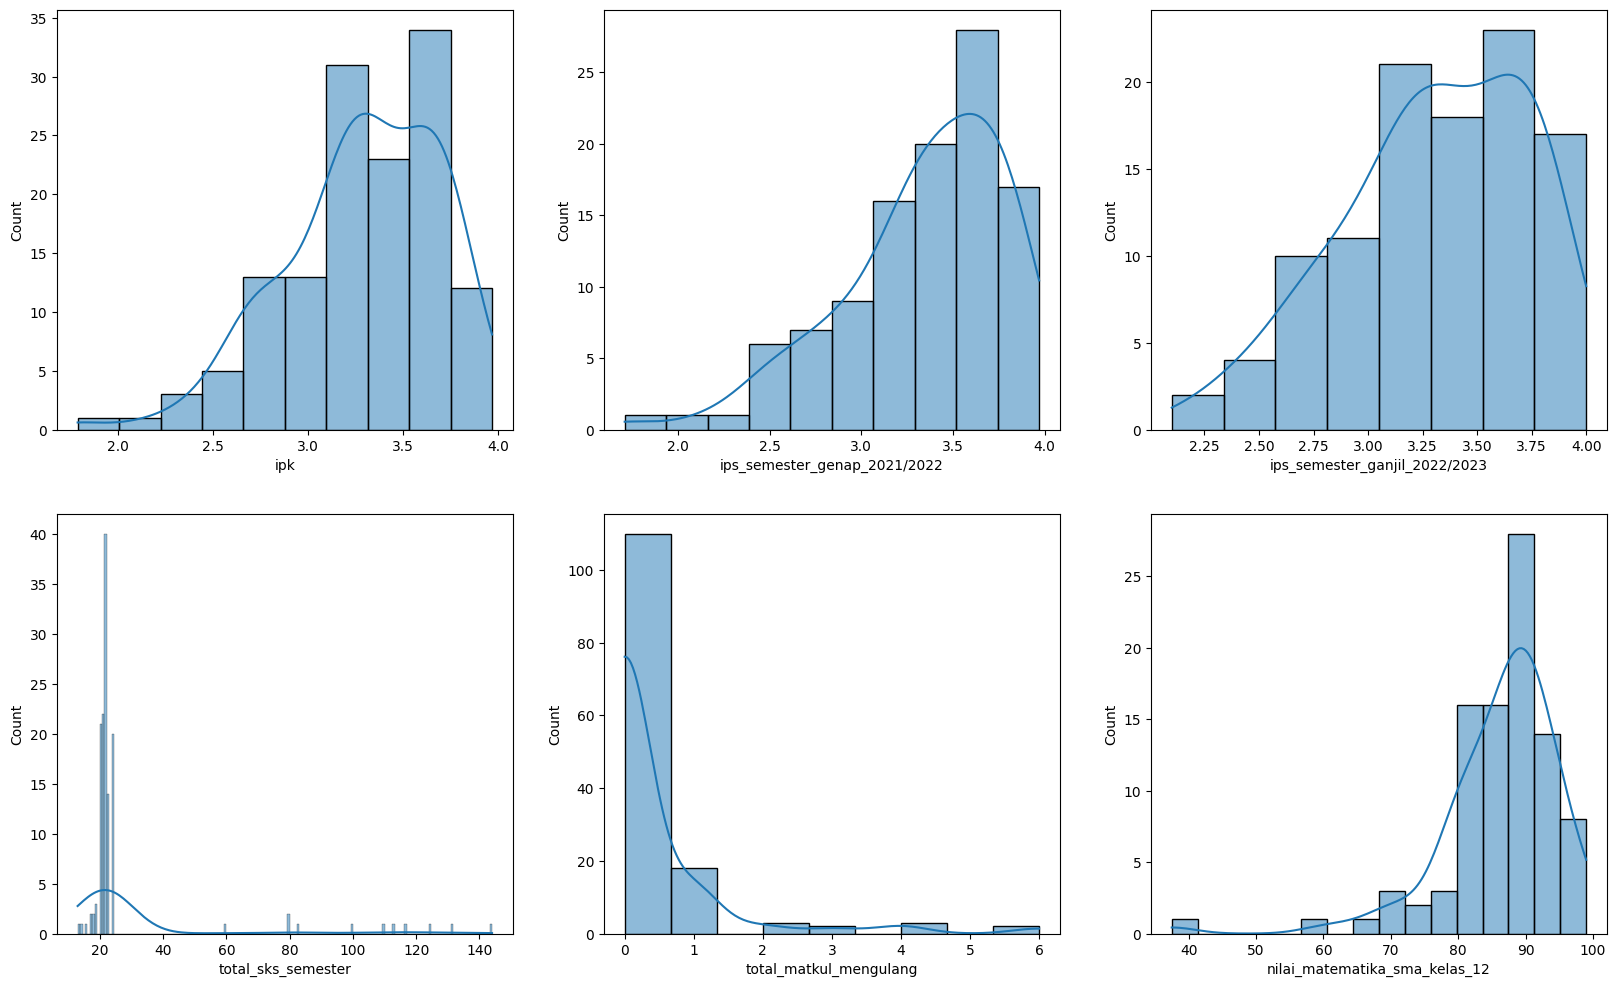

In [65]:
fig, axs = plt.subplots(2, 3, figsize=[20, 12])

for index, data in enumerate(missing_value_numerical.columns):
    sns.histplot(data=missing_value_numerical[data].astype(float), kde=True, ax=axs[index//3, index%3])

In [66]:
missing_value_numerical.median()

ipk                               3.325
ips_semester_genap_2021/2022      3.425
ips_semester_ganjil_2022/2023     3.340
total_sks_semester               22.000
total_matkul_mengulang            0.000
nilai_matematika_sma_kelas_12    89.000
dtype: float32

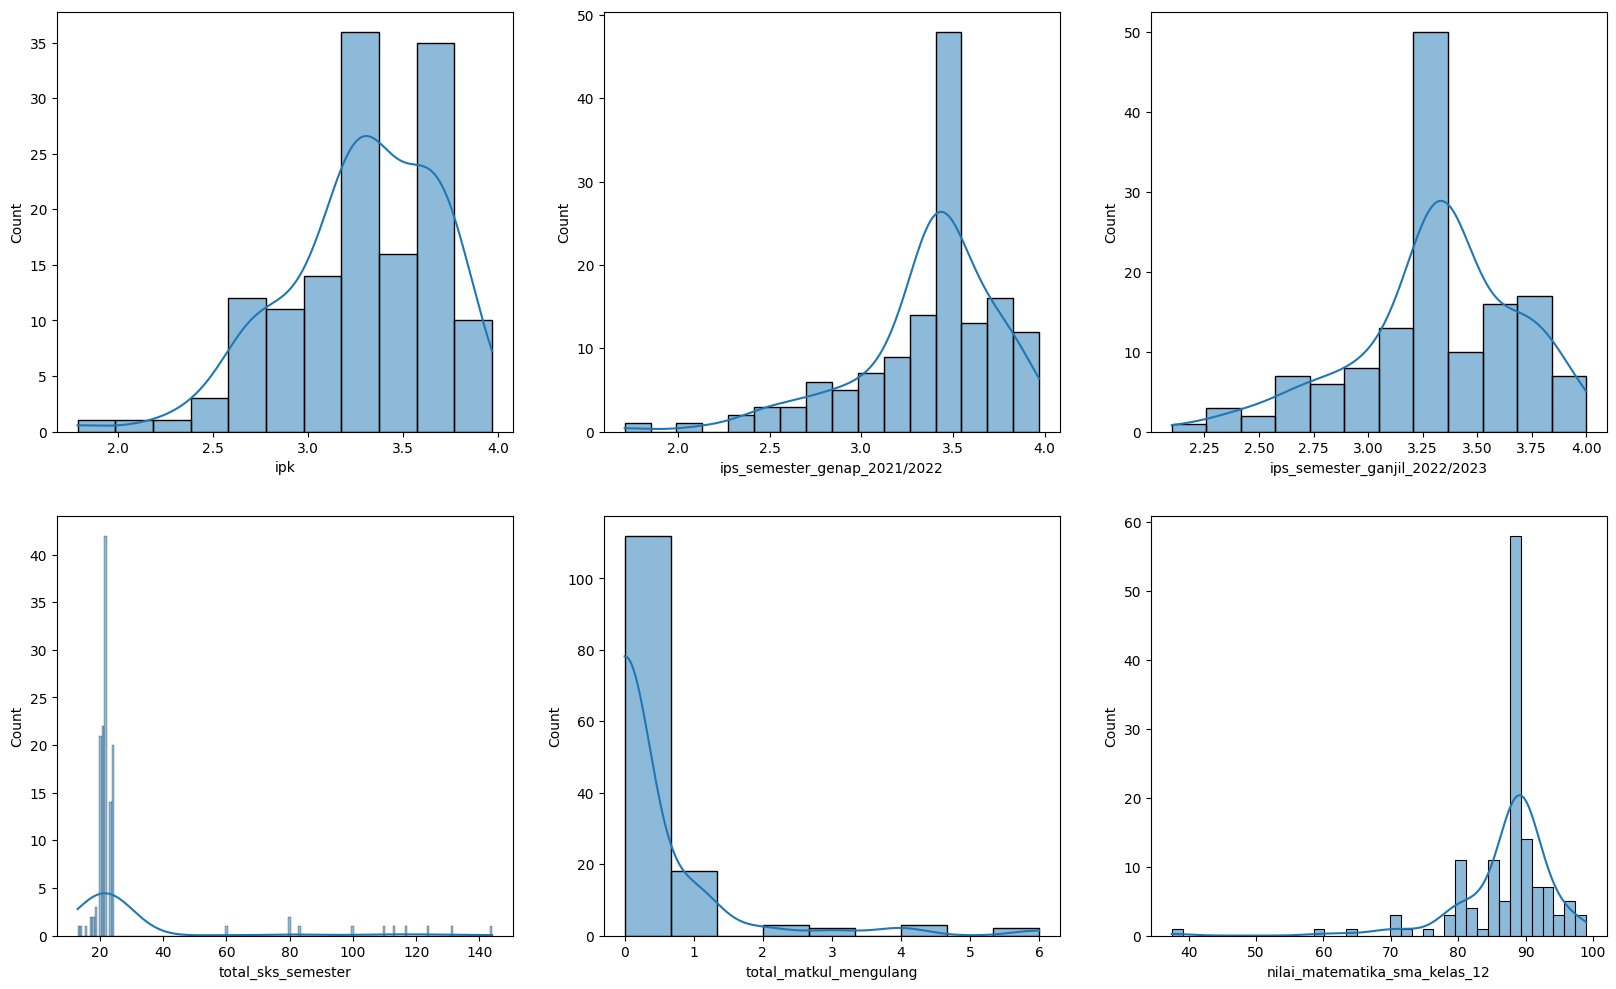

In [67]:
missing_value_numerical = missing_value_numerical.fillna(missing_value_numerical.median())

missing_value_columns[list_missing_value_numerical] = missing_value_numerical

fig, axs = plt.subplots(2, 3, figsize=[20, 12])
for index, data in enumerate(missing_value_columns[list_missing_value_numerical].columns):
    sns.histplot(data=missing_value_numerical[data].astype(float), kde=True, ax=axs[index//3, index%3])

### Categorical Data

In [68]:
list_missing_value_categorical = missing_value_columns.columns[missing_value_columns.isna().any()].tolist()
list_missing_value_categorical.remove('platform_belajar_online')

missing_value_categorical = missing_value_columns[list_missing_value_categorical]

for column, value in missing_value_categorical.items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value with Total Each Value: {value.value_counts(dropna=False)}')
    print('='*100)

Column Name: tahun_lahir | Unique Total: 6 | Data types: object
Unique Value with Total Each Value: tahun_lahir
2003    63
2002    43
2001    23
2000     5
2004     4
1999     1
NaN      1
Name: count, dtype: int64
Column Name: nilai_matkul_matematika_bisnis | Unique Total: 7 | Data types: object
Unique Value with Total Each Value: nilai_matkul_matematika_bisnis
NaN    85
a      31
b       8
c+      7
b+      3
c       3
b-      2
a-      1
Name: count, dtype: int64
Column Name: nilai_matkul_kalkulus_1 | Unique Total: 7 | Data types: object
Unique Value with Total Each Value: nilai_matkul_kalkulus_1
NaN    57
a      18
c      14
b      13
c+     12
a-     10
b-      9
b+      7
Name: count, dtype: int64
Column Name: nilai_matkul_bahasa_inggris_1 | Unique Total: 8 | Data types: object
Unique Value with Total Each Value: nilai_matkul_bahasa_inggris_1
a      39
b      30
b+     29
a-     27
b-      6
c       3
NaN     3
c+      2
e       1
Name: count, dtype: int64
Column Name: memiliki_b

In [69]:
missing_value_categorical.mode().iloc[0]

tahun_lahir                                         2003
nilai_matkul_matematika_bisnis                         a
nilai_matkul_kalkulus_1                                a
nilai_matkul_bahasa_inggris_1                          a
memiliki_beasiswa                                  tidak
jalur_pendaftaran_kampus                   seleksi rapot
tipe_sma                                        sma/sman
pendidikan_ibu                             sma/sederajat
pendidikan_ayah                            sma/sederajat
penghasilan_orang_tua             8.000.000 - 40.000.000
jenis_tempat_tinggal_keluarga                      rumah
cara_belajar_mahasiswa                            visual
total_mengikuti_lomba                                  0
Name: 0, dtype: object

In [70]:
missing_value_categorical = missing_value_categorical.fillna(missing_value_categorical.mode().iloc[0])

missing_value_columns[list_missing_value_categorical] = missing_value_categorical

for column, value in missing_value_columns[list_missing_value_categorical].items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value with Total Each Value: {value.value_counts(dropna=False)}')
    print('='*100)

Column Name: tahun_lahir | Unique Total: 6 | Data types: object
Unique Value with Total Each Value: tahun_lahir
2003    64
2002    43
2001    23
2000     5
2004     4
1999     1
Name: count, dtype: int64
Column Name: nilai_matkul_matematika_bisnis | Unique Total: 7 | Data types: object
Unique Value with Total Each Value: nilai_matkul_matematika_bisnis
a     116
b       8
c+      7
b+      3
c       3
b-      2
a-      1
Name: count, dtype: int64
Column Name: nilai_matkul_kalkulus_1 | Unique Total: 7 | Data types: object
Unique Value with Total Each Value: nilai_matkul_kalkulus_1
a     75
c     14
b     13
c+    12
a-    10
b-     9
b+     7
Name: count, dtype: int64
Column Name: nilai_matkul_bahasa_inggris_1 | Unique Total: 8 | Data types: object
Unique Value with Total Each Value: nilai_matkul_bahasa_inggris_1
a     42
b     30
b+    29
a-    27
b-     6
c      3
c+     2
e      1
Name: count, dtype: int64
Column Name: memiliki_beasiswa | Unique Total: 2 | Data types: object
Unique Va

### Multi Value Data

In [71]:
missing_value_multi_value = missing_value_columns['platform_belajar_online']

print(f'Column Name: {missing_value_multi_value.name} | Unique Total: {missing_value_multi_value.nunique()} | Data types: {missing_value_multi_value.dtype}')
print(f'Unique Value With Total Each Data: {missing_value_multi_value.value_counts(dropna=False)}')

Column Name: platform_belajar_online | Unique Total: 31 | Data types: object
Unique Value With Total Each Data: platform_belajar_online
tidak ada                                        91
ruangguru                                         5
ruangguru, zenius                                 4
NaN                                               3
coursera, ruangguru, zenius                       3
udemy, dicoding, sanbercode                       2
coursera                                          2
youtube                                           2
coursera, ruangguru                               2
udemy                                             2
coursera, zenius                                  2
zenius                                            2
dicoding, alterra, revou                          1
dicoding, sololearn                               1
coursera, hackerrank, udemy, sololearn            1
coursera, dicoding, sololearn, sanbercode         1
hackerrank, dicoding, sololearn 

In [72]:
missing_value_multi_value = missing_value_multi_value.fillna(missing_value_multi_value.mode().iloc[0])

missing_value_columns['platform_belajar_online'] = missing_value_multi_value

print(f'Column Name: {missing_value_multi_value.name} | Unique Total: {missing_value_multi_value.nunique()} | Data types: {missing_value_multi_value.dtype}')
print(f'Unique Value With Total Each Data: {missing_value_multi_value.value_counts(dropna=False)}')

Column Name: platform_belajar_online | Unique Total: 31 | Data types: object
Unique Value With Total Each Data: platform_belajar_online
tidak ada                                        94
ruangguru                                         5
ruangguru, zenius                                 4
coursera, ruangguru, zenius                       3
udemy, dicoding, sanbercode                       2
zenius                                            2
coursera                                          2
youtube                                           2
coursera, zenius                                  2
coursera, ruangguru                               2
udemy                                             2
coursera, udemy                                   1
dicoding, sololearn                               1
coursera, hackerrank, udemy, sololearn            1
coursera, dicoding, sololearn, sanbercode         1
hackerrank, dicoding, sololearn                   1
built with angga                

### Combine All Missing Data Treatment

In [73]:
df_cleaned[missing_value_columns.columns] = missing_value_columns

df_cleaned.isna().any()

NIM                                    False
nama_kelas                             False
jenis_kelamin                          False
tahun_lahir                            False
tempat_tinggal_kuliah                  False
provinsi_asal                          False
ipk                                    False
ips_semester_genap_2021/2022           False
ips_semester_ganjil_2022/2023          False
nilai_matkul_matematika_bisnis         False
nilai_matkul_kalkulus_1                False
nilai_matkul_bahasa_inggris_1          False
total_sks_semester                     False
total_matkul_mengulang                 False
memiliki_beasiswa                      False
jalur_pendaftaran_kampus               False
tipe_sma                               False
latar_belakang_sma                     False
nilai_matematika_sma_kelas_12          False
pendidikan_ibu                         False
pendidikan_ayah                        False
jumlah_saudara                         False
role_model

## Convert Cleaned Dataframe to CSV

For other research purpose

In [74]:
display(df_cleaned.head())

df_cleaned.to_csv('data_kuisioner_mahasiswa_cleaned.csv', index=False)

,NIM,nama_kelas,jenis_kelamin,tahun_lahir,tempat_tinggal_kuliah,provinsi_asal,ipk,ips_semester_genap_2021/2022,ips_semester_ganjil_2022/2023,nilai_matkul_matematika_bisnis,...,suka_lomba,total_mengikuti_lomba,sosial_media,total_akses_sosial_media,genre_permainan,jenis_organisasi,jenis_ukm,estimasi_waktu_perjalanan_ke_kampus,durasi_bekerja_selama_kuliah,tipe_pekerjaan_selama_kuliah
0,103120114,sistem informasi manajemen,laki-laki,2000,bersama orang tua,dki jakarta,3.010,2.950,3.10,b,...,4.0,11-20,tiktok,3-5,"strategi, multiplayer",organisasi keahlian,olahraga,<15,20-45,part-time
1,103121024,sistem informasi manajemen,laki-laki,2001,kos,jawa tengah,3.250,3.190,3.31,b,...,2.0,0,instagram,3-5,strategi,tidak mengikuti organisasi,tidak mengikuti kegiatan ukm,15-30,20-45,berdagang/berjualan
2,103121035,sistem informasi manajemen,laki-laki,2003,bersama orang tua,dki jakarta,3.290,3.330,3.08,a,...,2.0,0,instagram,1-3,"multiplayer, strategi, aksi, shooting",himpunan mahasiswa,tidak mengikuti kegiatan ukm,60-120,<10,freelance
3,103121017,sistem informasi manajemen,laki-laki,2003,bersama orang tua,dki jakarta,3.330,3.560,3.46,b,...,2.0,0,"instagram, twitter, tiktok",5-10,multiplayer,himpunan mahasiswa,olahraga,30-60,0,tidak bekerja
4,103121012,sistem informasi manajemen,laki-laki,2003,kos,sumatera utara,3.325,3.425,3.34,c+,...,2.0,0,"instagram, facebook, tiktok",1-3,"aksi, petualangan, strategi, teka-teki, olahraga",organisasi keagamaan,keagamaan,<15,<10,part-time


In [90]:
for column, value in df_cleaned.items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value with Total Each Value: {value.value_counts(dropna=False)}')
    print('='*100)

Column Name: NIM | Unique Total: 140 | Data types: int64
Unique Value with Total Each Value: NIM
103120114    1
105220045    1
101121024    1
101121041    1
101121040    1
            ..
103121094    1
103121070    1
103121056    1
103121059    1
105220041    1
Name: count, Length: 140, dtype: int64
Column Name: nama_kelas | Unique Total: 3 | Data types: object
Unique Value with Total Each Value: nama_kelas
sistem informasi manajemen                           55
praktikum pembelajaran mesin prodi ilmu komputer     44
sains data dan pembelajaran mesin dalam geofisika    41
Name: count, dtype: int64
Column Name: jenis_kelamin | Unique Total: 2 | Data types: object
Unique Value with Total Each Value: jenis_kelamin
laki-laki    75
perempuan    65
Name: count, dtype: int64
Column Name: tahun_lahir | Unique Total: 6 | Data types: object
Unique Value with Total Each Value: tahun_lahir
2003    64
2002    43
2001    23
2000     5
2004     4
1999     1
Name: count, dtype: int64
Column Name: temp

# Data Transformation

In [75]:
df_transformed = df_cleaned.drop(columns='NIM')

In [76]:
for column, value in df_transformed.items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')
    print('='*100)

Column Name: nama_kelas | Unique Total: 3 | Data types: object
Unique Value: ['sistem informasi manajemen'
 'sains data dan pembelajaran mesin dalam geofisika'
 'praktikum pembelajaran mesin prodi ilmu komputer']
Column Name: jenis_kelamin | Unique Total: 2 | Data types: object
Unique Value: ['laki-laki' 'perempuan']
Column Name: tahun_lahir | Unique Total: 6 | Data types: object
Unique Value: ['2000' '2001' '2003' '2002' '1999' '2004']
Column Name: tempat_tinggal_kuliah | Unique Total: 6 | Data types: object
Unique Value: ['bersama orang tua' 'kos' 'kontrakan' 'asrama'
 'bersama anggota keluarga besar' 'apartemen']
Column Name: provinsi_asal | Unique Total: 24 | Data types: object
Unique Value: ['dki jakarta' 'jawa tengah' 'sumatera utara' 'jawa barat' 'banten'
 'kalimantan timur' 'jawa timur' 'sumatera selatan' 'riau' 'bengkulu'
 'nanggroe aceh darussalam' 'nusa tenggara timur' 'sulawesi selatan'
 'sulawesi tengah' 'papua barat' 'sulawesi tenggara' 'sulawesi utara'
 'maluku utara' 'p

In [77]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   nama_kelas                           140 non-null    object 
 1   jenis_kelamin                        140 non-null    object 
 2   tahun_lahir                          140 non-null    object 
 3   tempat_tinggal_kuliah                140 non-null    object 
 4   provinsi_asal                        140 non-null    object 
 5   ipk                                  140 non-null    float32
 6   ips_semester_genap_2021/2022         140 non-null    float32
 7   ips_semester_ganjil_2022/2023        140 non-null    float32
 8   nilai_matkul_matematika_bisnis       140 non-null    object 
 9   nilai_matkul_kalkulus_1              140 non-null    object 
 10  nilai_matkul_bahasa_inggris_1        140 non-null    object 
 11  total_sks_semester              

## Data Normalization

In [78]:
list_numeric_data = df_transformed.select_dtypes('number').columns.tolist()
columns_numeric_data = df_transformed[list_numeric_data].copy()
columns_numeric_data.head()

,ipk,ips_semester_genap_2021/2022,ips_semester_ganjil_2022/2023,total_sks_semester,total_matkul_mengulang,nilai_matematika_sma_kelas_12
0,3.010,2.950,3.10,110.0,1.0,70.0
1,3.250,3.190,3.31,22.0,0.0,89.0
2,3.290,3.330,3.08,22.0,0.0,89.0
3,3.330,3.560,3.46,22.0,1.0,82.0
4,3.325,3.425,3.34,22.0,0.0,89.0


In [79]:
scaler = MinMaxScaler()
columns_numeric_data[list_numeric_data] = scaler.fit_transform(columns_numeric_data[list_numeric_data])

df_transformed[list_numeric_data] = columns_numeric_data

df_transformed[list_numeric_data].head()

,ipk,ips_semester_genap_2021/2022,ips_semester_ganjil_2022/2023,total_sks_semester,total_matkul_mengulang,nilai_matematika_sma_kelas_12
0,0.559633,0.548673,0.526316,0.740458,0.166667,0.528455
1,0.669725,0.654867,0.636842,0.068702,0.000000,0.837398
2,0.688073,0.716814,0.515790,0.068702,0.000000,0.837398
3,0.706422,0.818584,0.715790,0.068702,0.166667,0.723577
4,0.704128,0.758850,0.652632,0.068702,0.000000,0.837398


## Data Encoding

Reference:
<ol>
    
  <li>For Ordinal Encoding vs One Hot Encoding</li>
    <a href="https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor">https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor</a><br>
    <a href="https://medium.com/@milanbhadja7932/one-hot-encoding-and-label-encoding-3a329481984e">https://medium.com/@milanbhadja7932/one-hot-encoding-and-label-encoding-3a329481984e</a><br>
    <a href="https://www.formpl.us/blog/nominal-ordinal-data">https://www.formpl.us/blog/nominal-ordinal-data</a><br>
    
  <li>For Multi Data Column</li>
    <a href="https://stackoverflow.com/questions/37646473/how-could-i-do-one-hot-encoding-with-multiple-values-in-one-cell">https://stackoverflow.com/questions/37646473/how-could-i-do-one-hot-encoding-with-multiple-values-in-one-cell</a><br>
    <a href="https://stats.stackexchange.com/questions/467633/what-exactly-is-multi-hot-encoding-and-how-is-it-different-from-one-hot">https://stats.stackexchange.com/questions/467633/what-exactly-is-multi-hot-encoding-and-how-is-it-different-from-one-hot</a><br>
    <a href="https://stackoverflow.com/questions/67108935/dataframe-with-multiple-values-in-each-column-how-to-one-hot-encode-them-under">https://stackoverflow.com/questions/67108935/dataframe-with-multiple-values-in-each-column-how-to-one-hot-encode-them-under</a><br>
    <a href="https://stats.stackexchange.com/questions/596523/encode-multiple-values-of-an-attributes-in-pandas">https://stats.stackexchange.com/questions/596523/encode-multiple-values-of-an-attributes-in-pandas</a><br>
    <a href="https://stackoverflow.com/questions/60153981/scikit-learn-one-hot-encoding-certain-columns-of-a-pandas-dataframe">https://stackoverflow.com/questions/60153981/scikit-learn-one-hot-encoding-certain-columns-of-a-pandas-dataframe</a><br>
</ol>


In [80]:
total_column_before_encoding = len(df_transformed.columns)
print(f'Total Column Before Encoding: {total_column_before_encoding}')
print('='*100)
print()

for column, value in df_transformed.items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')
    print('='*100)

Total Column Before Encoding: 39

Column Name: nama_kelas | Unique Total: 3 | Data types: object
Unique Value: ['sistem informasi manajemen'
 'sains data dan pembelajaran mesin dalam geofisika'
 'praktikum pembelajaran mesin prodi ilmu komputer']
Column Name: jenis_kelamin | Unique Total: 2 | Data types: object
Unique Value: ['laki-laki' 'perempuan']
Column Name: tahun_lahir | Unique Total: 6 | Data types: object
Unique Value: ['2000' '2001' '2003' '2002' '1999' '2004']
Column Name: tempat_tinggal_kuliah | Unique Total: 6 | Data types: object
Unique Value: ['bersama orang tua' 'kos' 'kontrakan' 'asrama'
 'bersama anggota keluarga besar' 'apartemen']
Column Name: provinsi_asal | Unique Total: 24 | Data types: object
Unique Value: ['dki jakarta' 'jawa tengah' 'sumatera utara' 'jawa barat' 'banten'
 'kalimantan timur' 'jawa timur' 'sumatera selatan' 'riau' 'bengkulu'
 'nanggroe aceh darussalam' 'nusa tenggara timur' 'sulawesi selatan'
 'sulawesi tengah' 'papua barat' 'sulawesi tenggara' '

### Ordinal Encoding for Ordinal Data

In [81]:
list_ordinal_data = [
    'jenis_kelamin',
    'tahun_lahir',
    'nilai_matkul_matematika_bisnis',
    'nilai_matkul_kalkulus_1',
    'nilai_matkul_bahasa_inggris_1',
    'memiliki_beasiswa',
    'tipe_sma',
    'latar_belakang_sma',
    'pendidikan_ibu',
    'pendidikan_ayah',
    'jumlah_saudara',
    'penghasilan_orang_tua',
    'rating_kesan_mata_kuliah',
    'waktu_khusus_belajar',
    'akses_pembelajaran',
    'suka_lomba',
    'total_mengikuti_lomba',
    'total_akses_sosial_media',
    'estimasi_waktu_perjalanan_ke_kampus',
    'durasi_bekerja_selama_kuliah',
]

columns_ordinal_data = df_transformed[list_ordinal_data].copy()
for column, value in columns_ordinal_data.items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')
    print('='*100)

Column Name: jenis_kelamin | Unique Total: 2 | Data types: object
Unique Value: ['laki-laki' 'perempuan']
Column Name: tahun_lahir | Unique Total: 6 | Data types: object
Unique Value: ['2000' '2001' '2003' '2002' '1999' '2004']
Column Name: nilai_matkul_matematika_bisnis | Unique Total: 7 | Data types: object
Unique Value: ['b' 'a' 'c+' 'b-' 'a-' 'b+' 'c']
Column Name: nilai_matkul_kalkulus_1 | Unique Total: 7 | Data types: object
Unique Value: ['a' 'a-' 'b+' 'b' 'c' 'b-' 'c+']
Column Name: nilai_matkul_bahasa_inggris_1 | Unique Total: 8 | Data types: object
Unique Value: ['a-' 'b' 'a' 'b-' 'b+' 'c+' 'c' 'e']
Column Name: memiliki_beasiswa | Unique Total: 2 | Data types: object
Unique Value: ['tidak' 'ya']
Column Name: tipe_sma | Unique Total: 5 | Data types: object
Unique Value: ['sma/sman' 'mengulang kuliah' 'smk/smkn' 'ma/man' 'boarding school']
Column Name: latar_belakang_sma | Unique Total: 2 | Data types: object
Unique Value: ['negeri' 'swasta']
Column Name: pendidikan_ibu | Uniq

In [82]:
oe = OrdinalEncoder()

columns_ordinal_data[list_ordinal_data] = oe.fit_transform(columns_ordinal_data[list_ordinal_data])
columns_ordinal_data

,jenis_kelamin,tahun_lahir,nilai_matkul_matematika_bisnis,nilai_matkul_kalkulus_1,nilai_matkul_bahasa_inggris_1,memiliki_beasiswa,tipe_sma,latar_belakang_sma,pendidikan_ibu,pendidikan_ayah,jumlah_saudara,penghasilan_orang_tua,rating_kesan_mata_kuliah,waktu_khusus_belajar,akses_pembelajaran,suka_lomba,total_mengikuti_lomba,total_akses_sosial_media,estimasi_waktu_perjalanan_ke_kampus,durasi_bekerja_selama_kuliah
0,0.0,1.0,2.0,0.0,1.0,0.0,3.0,0.0,5.0,5.0,1.0,4.0,3.0,1.0,0.0,3.0,2.0,2.0,3.0,2.0
1,0.0,2.0,2.0,0.0,2.0,0.0,3.0,0.0,5.0,5.0,1.0,0.0,3.0,1.0,1.0,1.0,0.0,2.0,0.0,2.0
2,0.0,4.0,0.0,0.0,1.0,0.0,3.0,0.0,2.0,2.0,1.0,1.0,3.0,1.0,0.0,1.0,0.0,1.0,2.0,3.0
3,0.0,4.0,2.0,0.0,0.0,0.0,3.0,0.0,2.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0
4,0.0,4.0,6.0,0.0,4.0,0.0,2.0,1.0,0.0,5.0,2.0,1.0,3.0,1.0,1.0,1.0,0.0,1.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.0,2.0,0.0,5.0,2.0,0.0,3.0,0.0,2.0,5.0,1.0,2.0,3.0,0.0,0.0,4.0,3.0,1.0,0.0,1.0
136,0.0,3.0,0.0,6.0,1.0,0.0,0.0,1.0,5.0,0.0,1.0,1.0,2.0,0.0,1.0,2.0,0.0,2.0,2.0,3.0
137,0.0,2.0,0.0,5.0,4.0,0.0,4.0,0.0,5.0,5.0,2.0,3.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
138,1.0,3.0,0.0,6.0,3.0,0.0,3.0,0.0,2.0,2.0,2.0,0.0,2.0,0.0,1.0,2.0,1.0,3.0,3.0,0.0


In [83]:
df_transformed[list_ordinal_data] = columns_ordinal_data

### One Hot Encoding for Nominal Data

In [84]:
list_nominal_data = [
    'nama_kelas',
    'tempat_tinggal_kuliah',
    'provinsi_asal',
    'jalur_pendaftaran_kampus',
    'jenis_tempat_tinggal_keluarga',
    'cara_belajar_mahasiswa'
]

for column, value in df_transformed[list_nominal_data].items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')
    print('='*100)

Column Name: nama_kelas | Unique Total: 3 | Data types: object
Unique Value: ['sistem informasi manajemen'
 'sains data dan pembelajaran mesin dalam geofisika'
 'praktikum pembelajaran mesin prodi ilmu komputer']
Column Name: tempat_tinggal_kuliah | Unique Total: 6 | Data types: object
Unique Value: ['bersama orang tua' 'kos' 'kontrakan' 'asrama'
 'bersama anggota keluarga besar' 'apartemen']
Column Name: provinsi_asal | Unique Total: 24 | Data types: object
Unique Value: ['dki jakarta' 'jawa tengah' 'sumatera utara' 'jawa barat' 'banten'
 'kalimantan timur' 'jawa timur' 'sumatera selatan' 'riau' 'bengkulu'
 'nanggroe aceh darussalam' 'nusa tenggara timur' 'sulawesi selatan'
 'sulawesi tengah' 'papua barat' 'sulawesi tenggara' 'sulawesi utara'
 'maluku utara' 'papua barat daya' 'bali' 'jambi' 'sumatera barat'
 'nusa tenggara barat' 'bangka belitung']
Column Name: jalur_pendaftaran_kampus | Unique Total: 7 | Data types: object
Unique Value: ['seleksi rapot' 'beasiswa aperti bumn' 'ujian

In [85]:
# ohe = OneHotEncoder()

# columns_nominal_data = df_transformed[list_nominal_data].copy()
# columns_nominal_data = pd.get_dummies(columns_nominal_data,
#                                       prefix=columns_nominal_data.columns.tolist(),
#                                       dtype=float,
#                                       drop_first=False)
# columns_nominal_data

In [86]:
df_transformed = pd.get_dummies(df_transformed,
                                prefix=df_transformed[list_nominal_data].columns.tolist(),
                                columns=list_nominal_data,
                                dtype=float,
                                drop_first=False)

In [87]:
temp1 = pd.DataFrame()
for column in list_nominal_data:
    temp2 = [col for col in df_transformed if col.startswith(column)]
    temp2 = df_transformed[temp2].copy()
    
    temp1 = pd.concat([temp1, temp2], axis=1)

temp1

,nama_kelas_praktikum pembelajaran mesin prodi ilmu komputer,nama_kelas_sains data dan pembelajaran mesin dalam geofisika,nama_kelas_sistem informasi manajemen,tempat_tinggal_kuliah_apartemen,tempat_tinggal_kuliah_asrama,tempat_tinggal_kuliah_bersama anggota keluarga besar,tempat_tinggal_kuliah_bersama orang tua,tempat_tinggal_kuliah_kontrakan,tempat_tinggal_kuliah_kos,provinsi_asal_bali,...,jalur_pendaftaran_kampus_ujian tes,jalur_pendaftaran_kampus_utbk/snbp,jenis_tempat_tinggal_keluarga_bersama anggota keluarga besar,jenis_tempat_tinggal_keluarga_kontrakan,jenis_tempat_tinggal_keluarga_rumah,jenis_tempat_tinggal_keluarga_rumah dinas,cara_belajar_mahasiswa_aural,cara_belajar_mahasiswa_kinestetic,cara_belajar_mahasiswa_reading,cara_belajar_mahasiswa_visual
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
136,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
137,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
138,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [89]:
print(f'Total Column Before Encoding: {total_column_before_encoding}')

total_column_after_OHE = len(df_transformed.columns)
print(f'Total Column After OHE for Nominal Data: {total_column_after_OHE}')

Total Column Before Encoding: 39
Total Column After OHE for Nominal Data: 81


### Multi Label Binarizer for Multi Value Column

In [178]:
list_multi_value = [
    'role_model_keluarga',
    'platform_belajar_online',
    'sosial_media',
    'genre_permainan',
    'jenis_organisasi',
    'jenis_ukm',
    'tipe_pekerjaan_selama_kuliah'
]

df_encode = df_transformed.copy()

In [179]:
for column, value in df_encode[list_multi_value].items():
    print(f'Column Name: {column} | Unique Total: {value.nunique()} | Data types: {value.dtype}')
    print(f'Unique Value: {value.unique()}')
    print('='*100)

Column Name: role_model_keluarga | Unique Total: 8 | Data types: object
Unique Value: ['bapak' 'kakek' 'kakak' 'tidak ada / rahasia' 'ibu' 'ibu, kakak'
 'bapak, ibu' 'paman']
Column Name: platform_belajar_online | Unique Total: 31 | Data types: object
Unique Value: ['tidak ada' 'zenius' 'coursera, zenius' 'udemy'
 'coursera, ruangguru, zenius' 'coursera, ruangguru' 'ruangguru, zenius'
 'ruangguru' 'coursera, udemy' 'ruangguru, zenius, quipper' 'coursera'
 'english academy' 'revou' 'dicoding'
 'coursera, udemy, sololearn, ruangguru, zenius' 'youtube'
 'udemy, myskill' 'hackerrank, sanbercode' 'coursera, udemy, dicoding'
 'coursera, dicoding' 'dicoding, alterra, revou'
 'udemy, dicoding, sanbercode' 'coursera, dicoding, sanbercode, ruangguru'
 'sanbercode' 'udemy, sololearn, sanbercode' 'built with angga'
 'hackerrank, dicoding, sololearn'
 'coursera, dicoding, sololearn, sanbercode'
 'coursera, hackerrank, udemy, sololearn' 'dicoding, sololearn' 'myskill']
Column Name: sosial_media | Un

In [180]:
df_encode[list_multi_value] = df_encode[list_multi_value].applymap(lambda x: x.split(', '))
df_encode[list_multi_value]

,role_model_keluarga,platform_belajar_online,sosial_media,genre_permainan,jenis_organisasi,jenis_ukm,tipe_pekerjaan_selama_kuliah
0,[bapak],[tidak ada],[tiktok],"[strategi, multiplayer]",[organisasi keahlian],[olahraga],[part-time]
1,[kakek],[tidak ada],[instagram],[strategi],[tidak mengikuti organisasi],[tidak mengikuti kegiatan ukm],[berdagang/berjualan]
2,[kakak],[tidak ada],[instagram],"[multiplayer, strategi, aksi, shooting]",[himpunan mahasiswa],[tidak mengikuti kegiatan ukm],[freelance]
3,[bapak],[tidak ada],"[instagram, twitter, tiktok]",[multiplayer],[himpunan mahasiswa],[olahraga],[tidak bekerja]
4,[bapak],[tidak ada],"[instagram, facebook, tiktok]","[aksi, petualangan, strategi, teka-teki, olahr...",[organisasi keagamaan],[keagamaan],[part-time]
...,...,...,...,...,...,...,...
135,[tidak ada / rahasia],"[coursera, dicoding, sololearn, sanbercode]","[instagram, facebook]","[aksi, strategi, multiplayer]",[tidak mengikuti organisasi],[tidak mengikuti kegiatan ukm],[freelance]
136,[bapak],"[coursera, hackerrank, udemy, sololearn]","[instagram, twitter, tiktok]","[aksi, strategi, multiplayer]","[himpunan mahasiswa, organisasi keagamaan, org...",[keagamaan],[magang/intern]
137,[ibu],"[dicoding, sololearn]","[instagram, facebook, twitter, tiktok]",[shooting],[himpunan mahasiswa],[tidak mengikuti kegiatan ukm],[tidak bekerja]
138,[ibu],[myskill],"[instagram, tiktok]","[strategi, teka-teki]",[himpunan mahasiswa],[tidak mengikuti kegiatan ukm],[tidak bekerja]


In [181]:
mlb = MultiLabelBinarizer()
for column, data in df_encode[list_multi_value].items():
    mlb_multi_value = mlb.fit_transform(data)
    columns_loc = df_encode.columns.get_loc(column)
#     print(f'{column}_{mlb.classes_}')
    print(f'column index: {columns_loc} | total classes: {len(mlb.classes_)}')
#     print(mlb_multi_value)
    
    df_encode = df_encode.drop(columns=column)
    for index_classes, name_classes in enumerate(mlb.classes_):
#         print(f'class index: {columns_loc+index_classes} | class name: {name_classes}')
#         print(f'data:\n{mlb_multi_value[:, index_classes]}')
        df_encode.insert(columns_loc,
                         f'{column}_{name_classes}',
                         mlb_multi_value[:, index_classes])        
    print('='*100)

column index: 17 | total classes: 6
column index: 26 | total classes: 16
column index: 45 | total classes: 7
column index: 53 | total classes: 8
column index: 61 | total classes: 10
column index: 71 | total classes: 9
column index: 82 | total classes: 8


In [182]:
# ohe = OneHotEncoder()

# temp = df_transformed.copy()
# temp = temp[list_multi_value].applymap(lambda x: x.split(', '))
# temp = ohe.fit_transform(temp[list_multi_value])
# temp

In [185]:
df_transformed = df_encode.copy()

print(f'Total Column Before Encoding: {total_column_before_encoding}')

total_column_after_MLB = len(df_transformed.columns)
print(f'Total Column After OHE for Nominal Data: {total_column_after_OHE} (total increase of {total_column_after_OHE-total_column_before_encoding} columns)')
print(f'Total Column After OHE for Nominal Data + MLB for Multi Value Data: {total_column_after_MLB} (total increase of {total_column_after_MLB-total_column_after_OHE} columns)')

Total Column Before Encoding: 39
Total Column After OHE for Nominal Data: 81 (total increase of 42 columns)
Total Column After OHE for Nominal Data + MLB for Multi Value Data: 138 (total increase of 57 columns)


In [267]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Columns: 138 entries, jenis_kelamin to cara_belajar_mahasiswa_visual
dtypes: float32(6), float64(68), int32(64)
memory usage: 112.8 KB


## Dimensional Reduction

https://towardsdatascience.com/a-step-by-step-implementation-of-principal-component-analysis-5520cc6cd598 <br>
https://www.jcchouinard.com/pca-with-python/ <br>
https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/ <br>
https://www.kaggle.com/code/kushal1506/deciding-n-components-in-pca/notebook <br>
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold

### PCA

#### Determine n_component Used from Explained Variance

In [255]:
temp = [1, 2, 3, 4, 5]
temp[3:]

[4, 5]

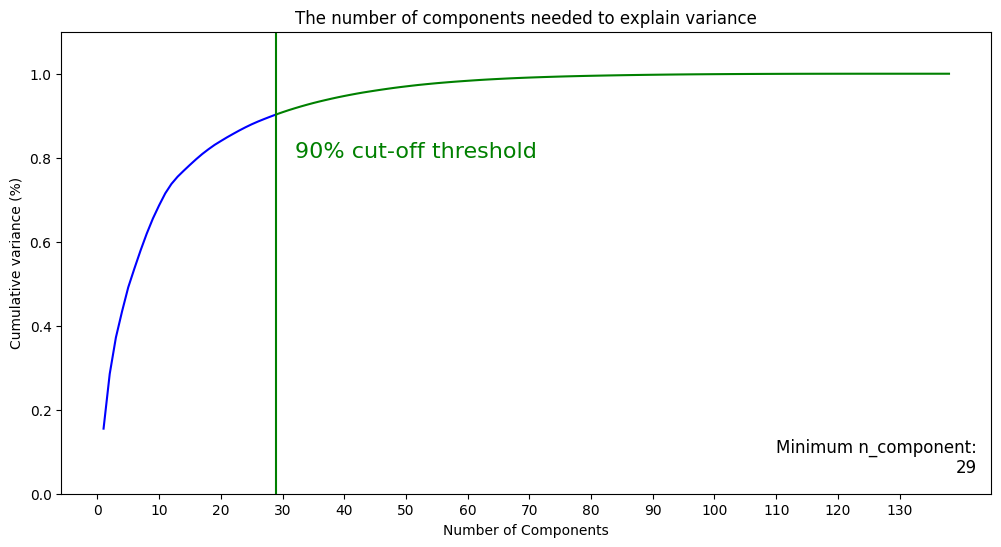

Minimum n_component that above threshold: 29


In [305]:
pca = PCA()
pca.fit(df_transformed)

number_component = np.arange(1, pca.n_components_ + 1, step=1)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

cum_var_threshold = 0.9
cum_var_above_threshold = [x+1 for x in range(len(cumulative_explained_variance)) if cumulative_explained_variance[x] >= cum_var_threshold]

fig, ax = plt.subplots(figsize=[12, 6])

plt.ylim(0.0,1.1)
# plt.plot(number_component, cumulative_explained_variance, marker='.', linestyle='-', color='b')
plt.plot(number_component[:cum_var_above_threshold[0]], cumulative_explained_variance[:cum_var_above_threshold[0]], linestyle='-', color='b')
plt.plot(number_component[cum_var_above_threshold[0] - 1:], cumulative_explained_variance[cum_var_above_threshold[0] - 1:], linestyle='-', color='g')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, pca.n_components_ + 1, step=10)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

# plt.axhline(y=cum_var_threshold, color='r', linestyle='-')
plt.axvline(x=cum_var_above_threshold[0], color='g', linestyle='-')
plt.text(cum_var_above_threshold[0]+3, 0.80, f'{int(cum_var_threshold*100)}% cut-off threshold', color = 'g', fontsize=16)
plt.text(110, 0.05, f'Minimum n_component:\n{cum_var_above_threshold[0]}', color = 'black', fontsize=12, multialignment='right')

plt.show()

print(f'Minimum n_component that above threshold: {cum_var_above_threshold[0]}')

#### Applying PCA to Dataset

In [247]:
pca = PCA(n_components=cum_var_above_threshold[0])
dataset_pca = pca.fit_transform(df_transformed)

df_pca = pd.DataFrame(dataset_pca,
                     columns=[f'PC{x}' for x in range(cum_var_above_threshold[0])])
df_pca

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28
0,-2.657256,-0.553311,-0.332296,-1.826826,-1.283039,-1.072854,0.972749,2.718839,-0.737317,0.537440,...,-0.793456,-0.479510,0.093283,0.393369,0.382767,-0.014425,0.537036,0.165064,-0.251281,-0.325099
1,-2.658107,-1.416540,1.284719,-0.202546,-2.101759,0.006823,1.616920,-0.734885,0.186707,-1.241195,...,-1.161159,-0.203171,-1.202698,0.001114,-0.022056,-0.124878,-0.405926,-0.291513,-0.235841,-0.137198
2,-0.012754,2.813863,0.115969,-1.122487,-2.363684,-0.178976,0.188500,-0.997916,0.472714,-1.437456,...,-0.665922,0.249759,0.218281,-0.657759,-0.250631,0.260827,0.154919,-0.081810,0.243623,-0.484006
3,-1.376423,1.915338,-0.416493,2.047633,-0.343476,-0.463257,0.345525,-1.920936,-0.253380,0.112362,...,-0.061199,-0.009607,0.784600,0.175043,0.830930,-0.216886,0.542901,0.432775,0.486376,-0.441825
4,-3.001100,2.999899,6.045998,0.050878,-0.063987,-0.733241,0.793609,-0.207319,-2.115881,-0.057395,...,-0.869762,-0.475518,0.267251,-0.327819,-0.002154,-0.502603,-1.129568,-0.276819,-0.454630,0.675339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2.871439,-1.108566,-0.027382,-0.921751,0.499495,-0.169534,3.860608,1.691014,-2.029378,1.133143,...,1.028736,1.343565,0.059168,-0.745109,0.695055,-0.445966,-0.486317,-0.830389,-0.316140,-0.313618
136,5.051182,-0.999423,0.060224,-0.123503,-2.626387,-0.736517,-2.631386,0.827978,-0.945510,-0.127650,...,0.738773,0.452208,0.460317,-0.167314,0.102181,-0.872107,-0.254266,-0.007490,-0.771541,-0.428146
137,2.415572,-3.594082,1.275556,0.538280,0.608514,0.165369,2.316279,1.495133,1.611718,-0.679777,...,0.208957,0.129562,0.812525,-0.429928,0.342428,-0.632871,-0.201832,-0.231745,0.174082,-0.543413
138,4.278113,-0.188588,1.295709,0.683502,2.640316,-0.470544,-0.815207,0.491769,-0.732768,-0.841354,...,0.005633,-0.156296,-0.116596,0.299656,0.016667,0.195621,0.420700,-0.753196,0.256050,-0.220848


# Convert Dataset For Modeling Purpose

In [291]:
df_pca.to_csv('dataset_kuisioner_modelling.csv', index=False)